<a href="https://www.kaggle.com/adisusilayasa1/forecasting-data-donasi-by-adi?scriptVersionId=86052771" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
from fbprophet import Prophet
import glob
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import datetime as dt

plt.style.use('fivethirtyeight')

# READ CSV

In [2]:
#Gabungin CSV - Pakai Glob
path = r'../input/data-donasi/Project-Machine-Learning-Forecasting-main/Online Donation/Guest/Donasi'
all_files_guest_donasi = glob.glob(path + "/*guest.csv")
print(all_files_guest_donasi)
print(len(all_files_guest_donasi))

['../input/data-donasi/Project-Machine-Learning-Forecasting-main/Online Donation/Guest/Donasi/Januari-donasi-guest.csv', '../input/data-donasi/Project-Machine-Learning-Forecasting-main/Online Donation/Guest/Donasi/Juni-donasi-guest.csv', '../input/data-donasi/Project-Machine-Learning-Forecasting-main/Online Donation/Guest/Donasi/Maret-donasi-guest.csv', '../input/data-donasi/Project-Machine-Learning-Forecasting-main/Online Donation/Guest/Donasi/Agustus-donasi-guest.csv', '../input/data-donasi/Project-Machine-Learning-Forecasting-main/Online Donation/Guest/Donasi/Desember-donasi-guest.csv', '../input/data-donasi/Project-Machine-Learning-Forecasting-main/Online Donation/Guest/Donasi/November-donasi-guest.csv', '../input/data-donasi/Project-Machine-Learning-Forecasting-main/Online Donation/Guest/Donasi/September-donasi-guest.csv', '../input/data-donasi/Project-Machine-Learning-Forecasting-main/Online Donation/Guest/Donasi/Februari-donasi-guest.csv', '../input/data-donasi/Project-Machine-L

In [3]:
#Gabungin CSV - Pakai Glob
path = r'../input/data-donasi/Project-Machine-Learning-Forecasting-main/Online Donation/Users/Donasi'
all_files_users_donasi = glob.glob(path + "/*users.csv")
print(all_files_users_donasi)
print(len(all_files_users_donasi))

['../input/data-donasi/Project-Machine-Learning-Forecasting-main/Online Donation/Users/Donasi/Agustus-donasi-users.csv', '../input/data-donasi/Project-Machine-Learning-Forecasting-main/Online Donation/Users/Donasi/Februari-donasi-users.csv', '../input/data-donasi/Project-Machine-Learning-Forecasting-main/Online Donation/Users/Donasi/Oktober-donasi-users.csv', '../input/data-donasi/Project-Machine-Learning-Forecasting-main/Online Donation/Users/Donasi/November-donasi-users.csv', '../input/data-donasi/Project-Machine-Learning-Forecasting-main/Online Donation/Users/Donasi/Mei-donasi-users.csv', '../input/data-donasi/Project-Machine-Learning-Forecasting-main/Online Donation/Users/Donasi/Januari-donasi-users.csv', '../input/data-donasi/Project-Machine-Learning-Forecasting-main/Online Donation/Users/Donasi/Maret-donasi-users.csv', '../input/data-donasi/Project-Machine-Learning-Forecasting-main/Online Donation/Users/Donasi/September-donasi-users.csv', '../input/data-donasi/Project-Machine-Lea

In [4]:
#Gabungin CSV - Pakai Glob
path = r'../input/data-donasi/Project-Machine-Learning-Forecasting-main/Online Donation/Users/Zakat'
all_files_users_zakat = glob.glob(path + "/*users.csv")
print(all_files_users_zakat)
print(len(all_files_users_zakat))

['../input/data-donasi/Project-Machine-Learning-Forecasting-main/Online Donation/Users/Zakat/November-zakat-users.csv', '../input/data-donasi/Project-Machine-Learning-Forecasting-main/Online Donation/Users/Zakat/Oktober-zakat-users.csv', '../input/data-donasi/Project-Machine-Learning-Forecasting-main/Online Donation/Users/Zakat/Maret-zakat-users.csv', '../input/data-donasi/Project-Machine-Learning-Forecasting-main/Online Donation/Users/Zakat/Desember-zakat-users.csv', '../input/data-donasi/Project-Machine-Learning-Forecasting-main/Online Donation/Users/Zakat/Februari-zakat-users.csv', '../input/data-donasi/Project-Machine-Learning-Forecasting-main/Online Donation/Users/Zakat/September-zakat-users.csv', '../input/data-donasi/Project-Machine-Learning-Forecasting-main/Online Donation/Users/Zakat/Juni-zakat-users.csv', '../input/data-donasi/Project-Machine-Learning-Forecasting-main/Online Donation/Users/Zakat/Agustus-zakat-users.csv', '../input/data-donasi/Project-Machine-Learning-Forecast

In [5]:
df_guest_zakat = pd.read_csv('../input/data-donasi/Project-Machine-Learning-Forecasting-main/Online Donation/Guest/Zakat/Januari-sampai-desember-zakat-guest.csv')
df_guest_zakat

,ID,nama_lengkap,platform,category,tanggal,total_zakat,status,metode_pembayaran
0,2702,Muhammad Ramadhan Alkausar,Web,Zakat Penghasilan,2021-01-05 08:41:38,150000.0,settlement,gopay
1,2704,Muhamad Haris Yahya,PWA,Zakat Penghasilan,2021-01-06 06:22:17,100000.0,settlement,bank_transfer
2,2710,Karunia Erldi Abraham,Web,Zakat Penghasilan,2021-01-07 12:24:06,1070000.0,settlement,bank_transfer
3,2718,Irma Suryati,PWA,Zakat Penghasilan,2021-01-09 09:14:30,1000000.0,settlement,echannel
4,2739,Arriman Maulana Makmoen,Web,Zakat Penghasilan,2021-01-18 23:07:35,5000000.0,settlement,bank_transfer
...,...,...,...,...,...,...,...,...
333,4019,Fraskatia Syahrin,CFD v2,Zakat Penghasilan,2021-11-30 13:10:03,150000.0,settlement,MANDIRI
334,4028,Dinar Swastika Ardias,CFD v2,Zakat Penghasilan,2021-12-02 21:06:24,345000.0,settlement,bank_transfer
335,4029,Hamba Allah,CFD v2,Zakat Penghasilan,2021-12-02 23:12:32,350000.0,settlement,bank_transfer
336,4030,Hamba Allah,CFD v2,Zakat Penghasilan,2021-12-02 23:16:33,480000.0,settlement,bank_transfer


In [6]:
df_guest_donasi = pd.concat((pd.read_csv(f, index_col=None, header=0) for f in all_files_guest_donasi), 
               axis = 0, ignore_index=True)

In [7]:
df_guest_donasi

,ID,nama_lengkap,platform,judul,tanggal,total_donasi,status,metode_pembayaran
0,27022,PUTU DARMA PUTRA,IOS,Berkah Dengan Sedekah,2021-01-05 05:32:07,20000.0,settlement,gopay
1,27045,Hamba Allah,PWA,PANTI ASUHAN YATIM DAN DHUAFA SALIHARA,2021-01-05 14:28:26,130662.0,settlement,Transfer Bank Mandiri - 1320505050535
2,27055,Evi Wirawan,PWA,Infaq Sedekah,2021-01-05 19:22:49,25000.0,settlement,bank_transfer
3,27061,Achmadi,PWA,PANTI ASUHAN YATIM DAN DHUAFA BALIKPAPAN,2021-01-05 21:11:39,100140.0,settlement,Transfer Bank Mandiri - 1320505050535
4,27083,Lia Soraya,PWA,BANTU BIAYA MAKAN UNTUK 47 PANTI YATIM DHUAFA,2021-01-06 00:30:37,50000.0,settlement,bank_transfer
...,...,...,...,...,...,...,...,...
2868,38399,Marissa,Web Mobile,BANTU BEBASKAN PANTI ASUHAN YATIM DAN DHUAFA,2021-07-30 22:54:31,140000.0,settlement,bank_transfer
2869,38404,windy,Android,PANTI ASUHAN YATIM DAN DHUAFA CITEUREUP CIMAHI,2021-07-31 07:41:47,50000.0,settlement,bank_transfer
2870,38421,Nuryatimah,Web Mobile,Berkah Dengan Sedekah,2021-07-31 18:03:39,200000.0,settlement,bank_transfer
2871,38422,Rizkita,Web Mobile,PANTI ASUHAN YATIM DAN DHUAFA ASEM BARIS,2021-07-31 18:10:16,100000.0,settlement,bank_transfer


In [8]:
df_users_donasi = pd.concat((pd.read_csv(f, index_col=None, header=0) for f in all_files_users_donasi), 
               axis = 0, ignore_index=True)

In [9]:
df_users_donasi 

,ID,name,platform,judul,tanggal,total_donasi,status,metode_pembayaran
0,38427,Syams Arif,WEB,Infaq Anak Yatim,2021-08-01 08:36:42,150000.0,settlement,BCA - 1393040100
1,38428,Moch. Dimas,WEB,Infaq Sedekah,2021-08-01 08:40:14,200000.0,settlement,BCA - 1393040002
2,38429,Ella Herliah. ST,WEB,Zakat,2021-08-01 09:04:04,300000.0,settlement,Mandiri - 1320006531140
3,38430,Yulia Yulianty,WEB,Infaq Sedekah,2021-08-01 09:15:45,480000.0,settlement,BCA - 1393004952
4,38445,M Nur Ikhsan,Web,Infaq Sedekah,2021-08-01 15:38:26,100000.0,settlement,bank_transfer
...,...,...,...,...,...,...,...,...
6203,43379,Mahfud Rofi,WEB,"Tak ada lagi Orangtua, Nur Ingin Tetap Sekolah",2021-12-06 08:25:29,100000.0,settlement,Mandiri - 1320006531140
6204,43380,Mahfud Rofi,WEB,Berkah Dengan Sedekah,2021-12-06 08:27:10,200000.0,settlement,Mandiri - 1320006531140
6205,43381,Sari Rafif Pasha,WEB,Berkah Dengan Sedekah,2021-12-06 08:28:33,10000.0,settlement,BCA - 1393004952
6206,43382,Lestari,WEB,Berkah Dengan Sedekah,2021-12-06 08:51:37,150000.0,settlement,Mandiri Syariah - 7277777775


In [10]:
df_users_zakat = pd.concat((pd.read_csv(f, index_col=None, header=0) for f in all_files_users_zakat), 
               axis = 0, ignore_index=True)

In [11]:
df_users_zakat

,ID,name,platform,category,tanggal,total_zakat,status,metode_pembayaran
0,3915,Melinda D A,WEB,Zakat Harta,2021-11-01 08:07:58,1000000.0,settlement,Mandiri - 1320006531140
1,3923,Hamba Allah,CFD v2,Zakat Penghasilan,2021-11-02 07:02:34,300000.0,settlement,BNI
2,3924,Nursidik Cahyono,WEB,Zakat Penghasilan,2021-11-02 08:12:52,350000.0,settlement,Mandiri - 1320006531140
3,3934,Akbar,Android,Zakat Penghasilan,2021-11-02 10:03:26,150000.0,settlement,bank_transfer
4,3938,Debby MSD,WEB,Zakat Penghasilan,2021-11-03 08:28:53,400000.0,settlement,BCA - 1393040002
...,...,...,...,...,...,...,...,...
332,3674,karina nur rahmi lestari,Web,Zakat Penghasilan,2021-05-26 12:49:41,350000.0,settlement,bank_transfer
333,3675,muhammad,Web,Zakat Penghasilan,2021-05-26 19:15:40,10450000.0,settlement,credit_card
334,3684,Kustia lyfia,Web Mobile,Zakat Penghasilan,2021-05-29 08:37:33,150000.0,settlement,bank_transfer
335,3685,Hamba Allah,Android,Zakat Penghasilan,2021-05-29 09:06:08,250000.0,settlement,BRI


# SAVE CSV

In [12]:
df_users_zakat.to_csv("./users_zakat.csv")
df_users_donasi.to_csv("./users_donasi.csv")
df_guest_zakat.to_csv("./guest_zakat.csv")
df_guest_donasi.to_csv("./guest_donasi.csv")

# PRE-PROCESSING

In [13]:
print(df_users_zakat.tanggal.dtype)
print(df_users_donasi.tanggal.dtype)
print(df_guest_zakat.tanggal.dtype)
print(df_guest_donasi.tanggal.dtype)

object
object
object
object


In [14]:
df_users_zakat.tanggal = pd.to_datetime(df_users_zakat.tanggal, format="%Y-%m-%d %H:%M:%S")
df_users_donasi.tanggal = pd.to_datetime(df_users_donasi.tanggal, format="%Y-%m-%d %H:%M:%S")
df_guest_zakat.tanggal = pd.to_datetime(df_guest_zakat.tanggal, format="%Y-%m-%d %H:%M:%S")
df_guest_donasi.tanggal = pd.to_datetime(df_guest_donasi.tanggal, format="%Y-%m-%d %H:%M:%S")

In [15]:
print(df_users_zakat.tanggal.dtype)
print(df_users_donasi.tanggal.dtype)
print(df_guest_zakat.tanggal.dtype)
print(df_guest_donasi.tanggal.dtype)

datetime64[ns]
datetime64[ns]
datetime64[ns]
datetime64[ns]


In [16]:
df_users_zakat.tanggal

0     2021-11-01 08:07:58
1     2021-11-02 07:02:34
2     2021-11-02 08:12:52
3     2021-11-02 10:03:26
4     2021-11-03 08:28:53
              ...        
332   2021-05-26 12:49:41
333   2021-05-26 19:15:40
334   2021-05-29 08:37:33
335   2021-05-29 09:06:08
336   2021-05-30 19:46:45
Name: tanggal, Length: 337, dtype: datetime64[ns]

In [17]:
df_users_zakat.sort_values(by=['tanggal'], inplace = True,  ignore_index=True)
df_users_donasi.sort_values(by=['tanggal'], inplace = True,  ignore_index=True)
df_guest_zakat.sort_values(by=['tanggal'], inplace = True,  ignore_index=True)
df_guest_donasi.sort_values(by=['tanggal'], inplace = True,  ignore_index=True)


In [18]:
df_guest_donasi

,ID,nama_lengkap,platform,judul,tanggal,total_donasi,status,metode_pembayaran
0,27022,PUTU DARMA PUTRA,IOS,Berkah Dengan Sedekah,2021-01-05 05:32:07,20000.0,settlement,gopay
1,27045,Hamba Allah,PWA,PANTI ASUHAN YATIM DAN DHUAFA SALIHARA,2021-01-05 14:28:26,130662.0,settlement,Transfer Bank Mandiri - 1320505050535
2,27055,Evi Wirawan,PWA,Infaq Sedekah,2021-01-05 19:22:49,25000.0,settlement,bank_transfer
3,27061,Achmadi,PWA,PANTI ASUHAN YATIM DAN DHUAFA BALIKPAPAN,2021-01-05 21:11:39,100140.0,settlement,Transfer Bank Mandiri - 1320505050535
4,27083,Lia Soraya,PWA,BANTU BIAYA MAKAN UNTUK 47 PANTI YATIM DHUAFA,2021-01-06 00:30:37,50000.0,settlement,bank_transfer
...,...,...,...,...,...,...,...,...
2868,43371,Prajitno,CFD v2,"Tak ada lagi Orangtua, Nur Ingin Tetap Sekolah",2021-12-06 03:31:41,20000.0,settlement,gopay
2869,43372,Yudi,CFD v2,"Ingin Jadi Pramugari, Yatim ini Berusaha Bahag...",2021-12-06 04:25:45,20000.0,settlement,gopay
2870,43373,Taufik,CFD v2,"Tak ada lagi Orangtua, Nur Ingin Tetap Sekolah",2021-12-06 04:45:15,20000.0,settlement,MANDIRI
2871,43374,Fajar sovin namiya,CFD v2,Jika Tidak Direnovasi Dengan Segera! Musholla ...,2021-12-06 04:51:17,20000.0,settlement,bank_transfer


In [19]:
df_users_zakat.describe()

,ID,total_zakat
count,337.000000,3.370000e+02
mean,3388.264095,5.802936e+05
std,501.750328,1.389357e+06
min,2689.000000,1.000000e+00
25%,2846.000000,1.500000e+05
50%,3698.000000,2.500000e+05
75%,3837.000000,5.000000e+05
max,4036.000000,1.162500e+07


In [20]:
df_users_donasi.describe()

,ID,total_donasi
count,6208.000000,6.208000e+03
mean,34943.644008,2.125779e+05
std,4781.814263,4.823703e+05
min,26790.000000,1.000000e+00
25%,30622.750000,2.500000e+04
50%,35062.000000,1.000000e+05
75%,38905.250000,2.000000e+05
max,43384.000000,1.000000e+07


In [21]:
df_guest_zakat.describe()

,ID,total_zakat
count,338.000000,3.380000e+02
mean,3407.393491,2.960036e+05
std,275.155002,9.613494e+05
min,2702.000000,1.000000e+04
25%,3201.250000,4.000000e+04
50%,3413.500000,7.000000e+04
75%,3585.750000,2.000000e+05
max,4033.000000,1.000000e+07


In [22]:
df_guest_donasi.describe()

,ID,total_donasi
count,2873.000000,2.873000e+03
mean,36470.638705,2.364189e+05
std,4615.058652,6.531753e+05
min,27022.000000,7.500000e+02
25%,32734.000000,3.000000e+04
50%,36402.000000,1.000000e+05
75%,40556.000000,2.000000e+05
max,43378.000000,2.000063e+07


In [23]:
missing_values_count = df_guest_donasi.isnull().sum()
missing_values_count[0:]

ID                    0
nama_lengkap         12
platform              4
judul                 0
tanggal               0
total_donasi          0
status                0
metode_pembayaran     0
dtype: int64

In [24]:
missing_values_count = df_guest_zakat.isnull().sum()
missing_values_count[0:]

ID                   0
nama_lengkap         0
platform             0
category             0
tanggal              0
total_zakat          0
status               0
metode_pembayaran    0
dtype: int64

In [25]:
missing_values_count = df_users_donasi.isnull().sum()
missing_values_count[0:]

ID                   0
name                 2
platform             0
judul                0
tanggal              0
total_donasi         0
status               0
metode_pembayaran    0
dtype: int64

In [26]:
missing_values_count = df_users_zakat.isnull().sum()
missing_values_count[0:]

ID                   0
name                 0
platform             1
category             0
tanggal              0
total_zakat          0
status               0
metode_pembayaran    0
dtype: int64

<AxesSubplot:title={'center':'All Guest Donasi in 2021'}, xlabel='tanggal', ylabel='total_donasi'>

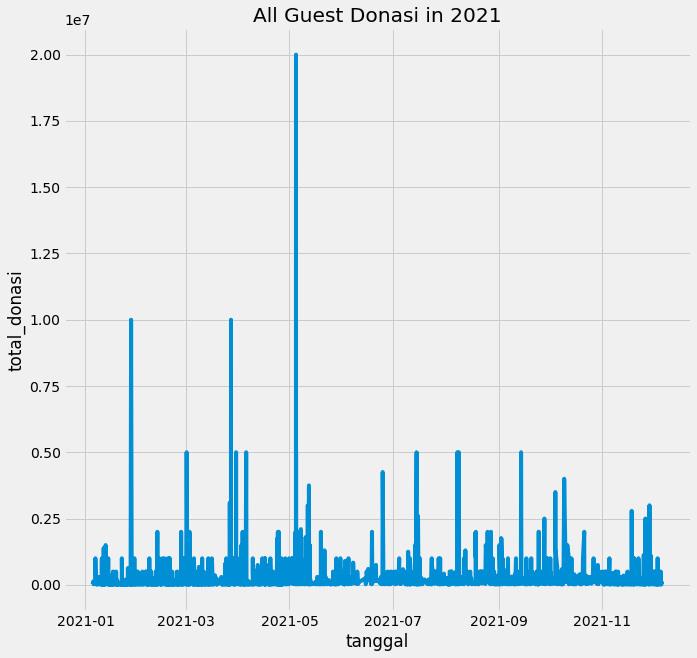

In [142]:
# Set the width and height of the figure
plt.figure(figsize=(10,10))

# Add title
plt.title("All Guest Donasi in 2021")

# Line chart showing Sales over Date mapped by Category
sns.lineplot(x='tanggal',y='total_donasi', data=df_guest_donasi)

In [28]:
df_guest_donasi.total_donasi.max()

20000628.0

<AxesSubplot:title={'center':'All Guest Zakat in 2021'}, xlabel='tanggal', ylabel='total_zakat'>

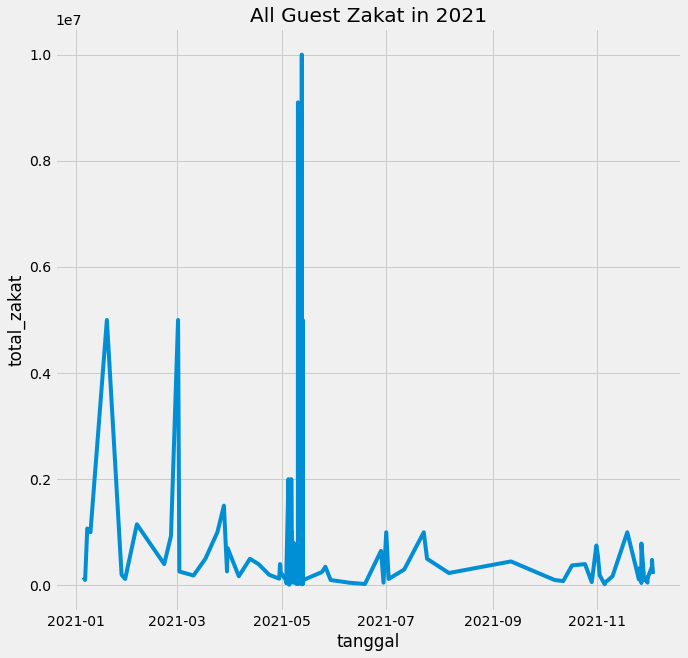

In [141]:
# Set the width and height of the figure
plt.figure(figsize=(10,10))

# Add title
plt.title("All Guest Zakat in 2021")

# Line chart showing Sales over Date mapped by Category
sns.lineplot(x='tanggal',y='total_zakat', data=df_guest_zakat)

In [30]:
df_guest_zakat.total_zakat.max()

10000000.0

<AxesSubplot:title={'center':'All Users Donasi in 2021'}, xlabel='tanggal', ylabel='total_donasi'>

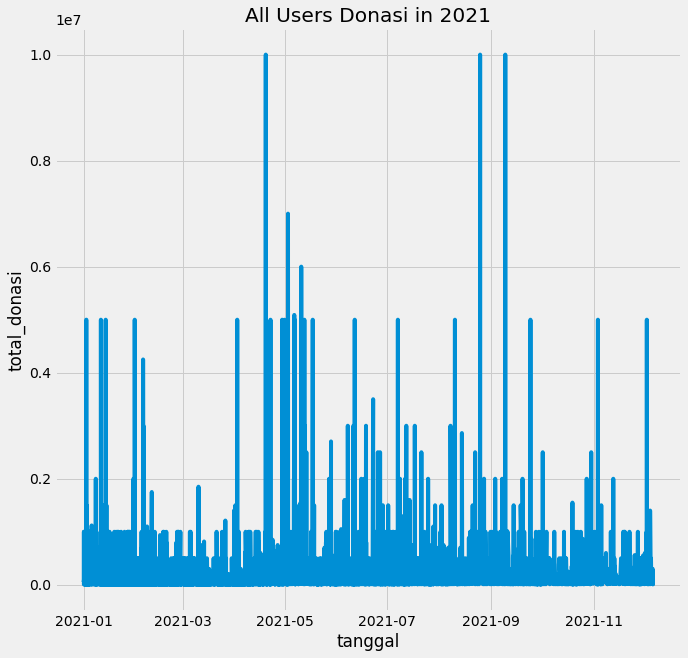

In [143]:
# Set the width and height of the figure
plt.figure(figsize=(10,10))

# Add title
plt.title("All Users Donasi in 2021")

# Line chart showing Sales over Date mapped by Category
sns.lineplot(x='tanggal',y='total_donasi', data=df_users_donasi)

In [32]:
df_users_donasi.total_donasi.max()

10000000.0

<AxesSubplot:title={'center':'All Users Zakat in 2021'}, xlabel='tanggal', ylabel='total_zakat'>

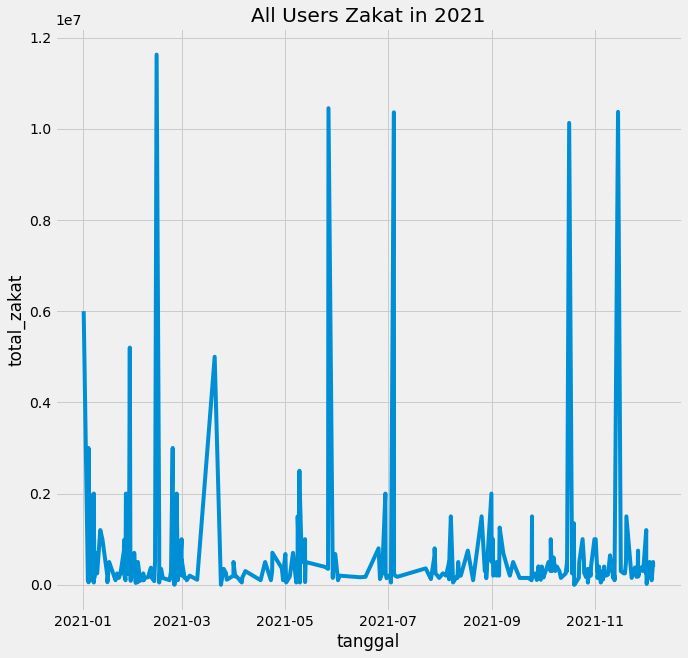

In [144]:
# Set the width and height of the figure
plt.figure(figsize=(10,10))

# Add title
plt.title("All Users Zakat in 2021")

# Line chart showing Sales over Date mapped by Category
sns.lineplot(x='tanggal',y='total_zakat', data=df_users_zakat)

In [34]:
df_users_zakat.total_zakat.max()

11625000.0

### Membuat total donasi per/hari

In [35]:
users_zakat = df_users_zakat[['tanggal','total_zakat']]
users_donasi = df_users_donasi[['tanggal','total_donasi']]
guest_zakat = df_guest_zakat[['tanggal','total_zakat']]
guest_donasi = df_guest_donasi[['tanggal','total_donasi']]

In [36]:
users_zakat['tanggal'] = pd.to_datetime(users_zakat.tanggal, format='%Y-%m-%d')
users_donasi['tanggal'] = pd.to_datetime(users_donasi.tanggal, format='%Y-%m-%d')
guest_zakat['tanggal'] = pd.to_datetime(guest_zakat.tanggal, format='%Y-%m-%d')
guest_donasi['tanggal'] = pd.to_datetime(guest_donasi.tanggal, format='%Y-%m-%d')

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

In [37]:
users_zakat['tanggal'] = users_zakat['tanggal'].dt.strftime('%Y-%m-%d')
users_donasi['tanggal'] = users_donasi['tanggal'].dt.strftime('%Y-%m-%d')
guest_zakat['tanggal'] = guest_zakat['tanggal'].dt.strftime('%Y-%m-%d')
guest_donasi['tanggal'] = guest_donasi['tanggal'].dt.strftime('%Y-%m-%d')

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

In [38]:
users_zakat = users_zakat.groupby('tanggal').sum()
users_donasi = users_donasi.groupby('tanggal').sum()
guest_zakat = guest_zakat.groupby('tanggal').sum()
guest_donasi = guest_donasi.groupby('tanggal').sum()

In [39]:
"""users_zakat.set_index('tanggal', inplace = True)
users_donasi.set_index('tanggal', inplace = True)
guest_zakat.set_index('tanggal', inplace = True)
guest_donasi.set_index('tanggal', inplace = True)"""

"users_zakat.set_index('tanggal', inplace = True)\nusers_donasi.set_index('tanggal', inplace = True)\nguest_zakat.set_index('tanggal', inplace = True)\nguest_donasi.set_index('tanggal', inplace = True)"

In [40]:
users_zakat.index  = pd.to_datetime(users_zakat.index)
users_donasi.index = pd.to_datetime(users_donasi.index)
guest_zakat.index  = pd.to_datetime(guest_zakat.index)
guest_donasi.index = pd.to_datetime(guest_donasi.index)

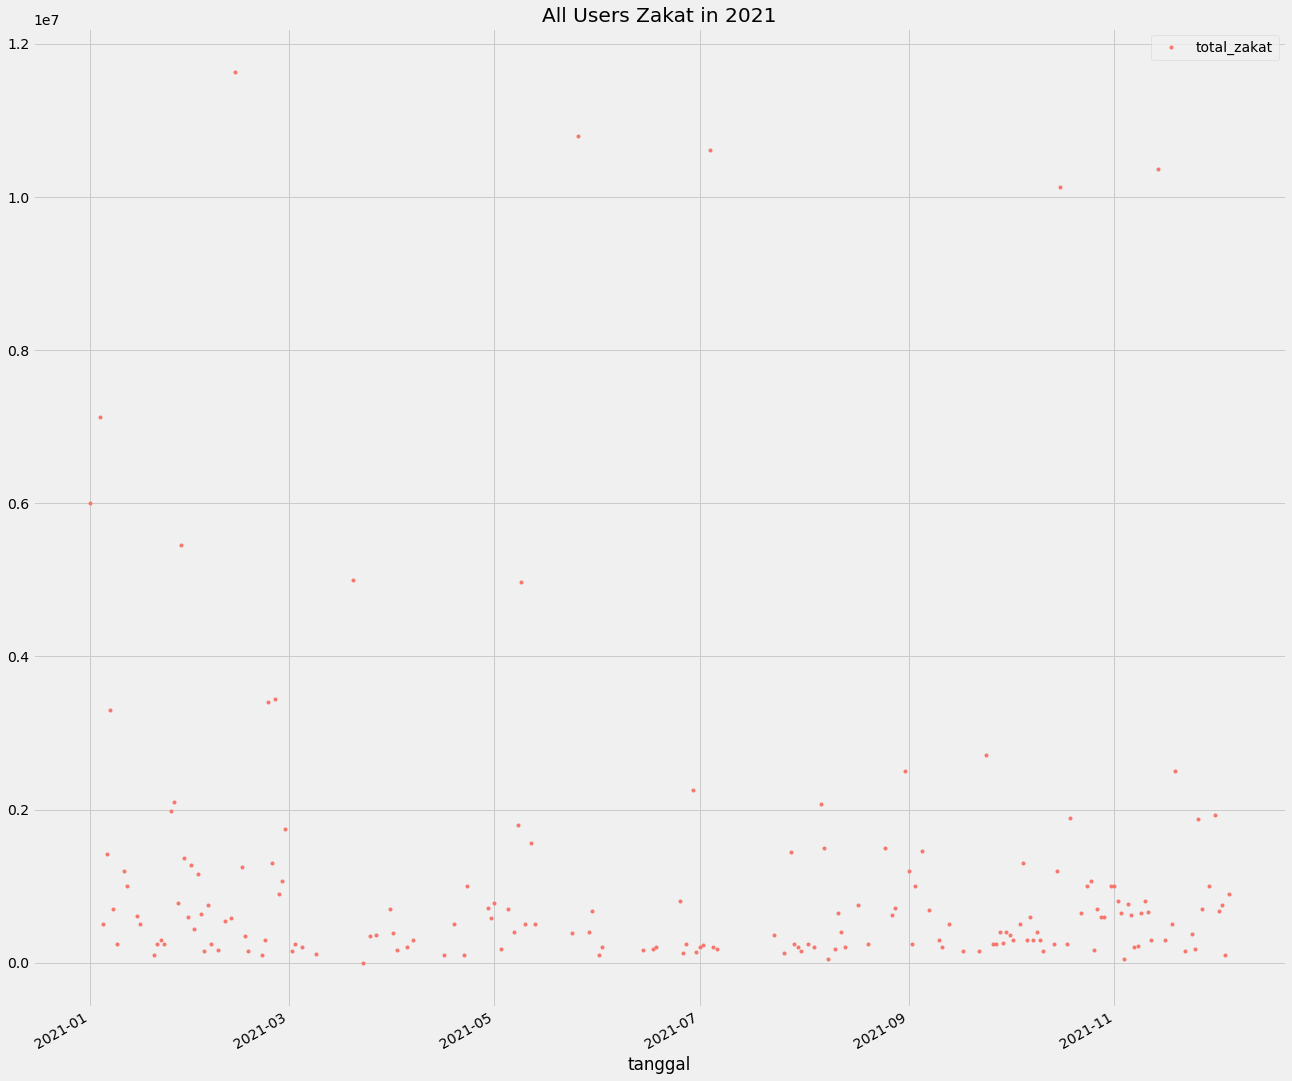

In [41]:
# Color pallete for plotting
color_pal = ["#F8766D", "#D39200", "#93AA00",
             "#00BA38", "#00C19F", "#00B9E3",
             "#619CFF", "#DB72FB"]
users_zakat.plot(style='.', figsize=(20,20), color=color_pal[0], title="All Users Zakat in 2021")
plt.show()

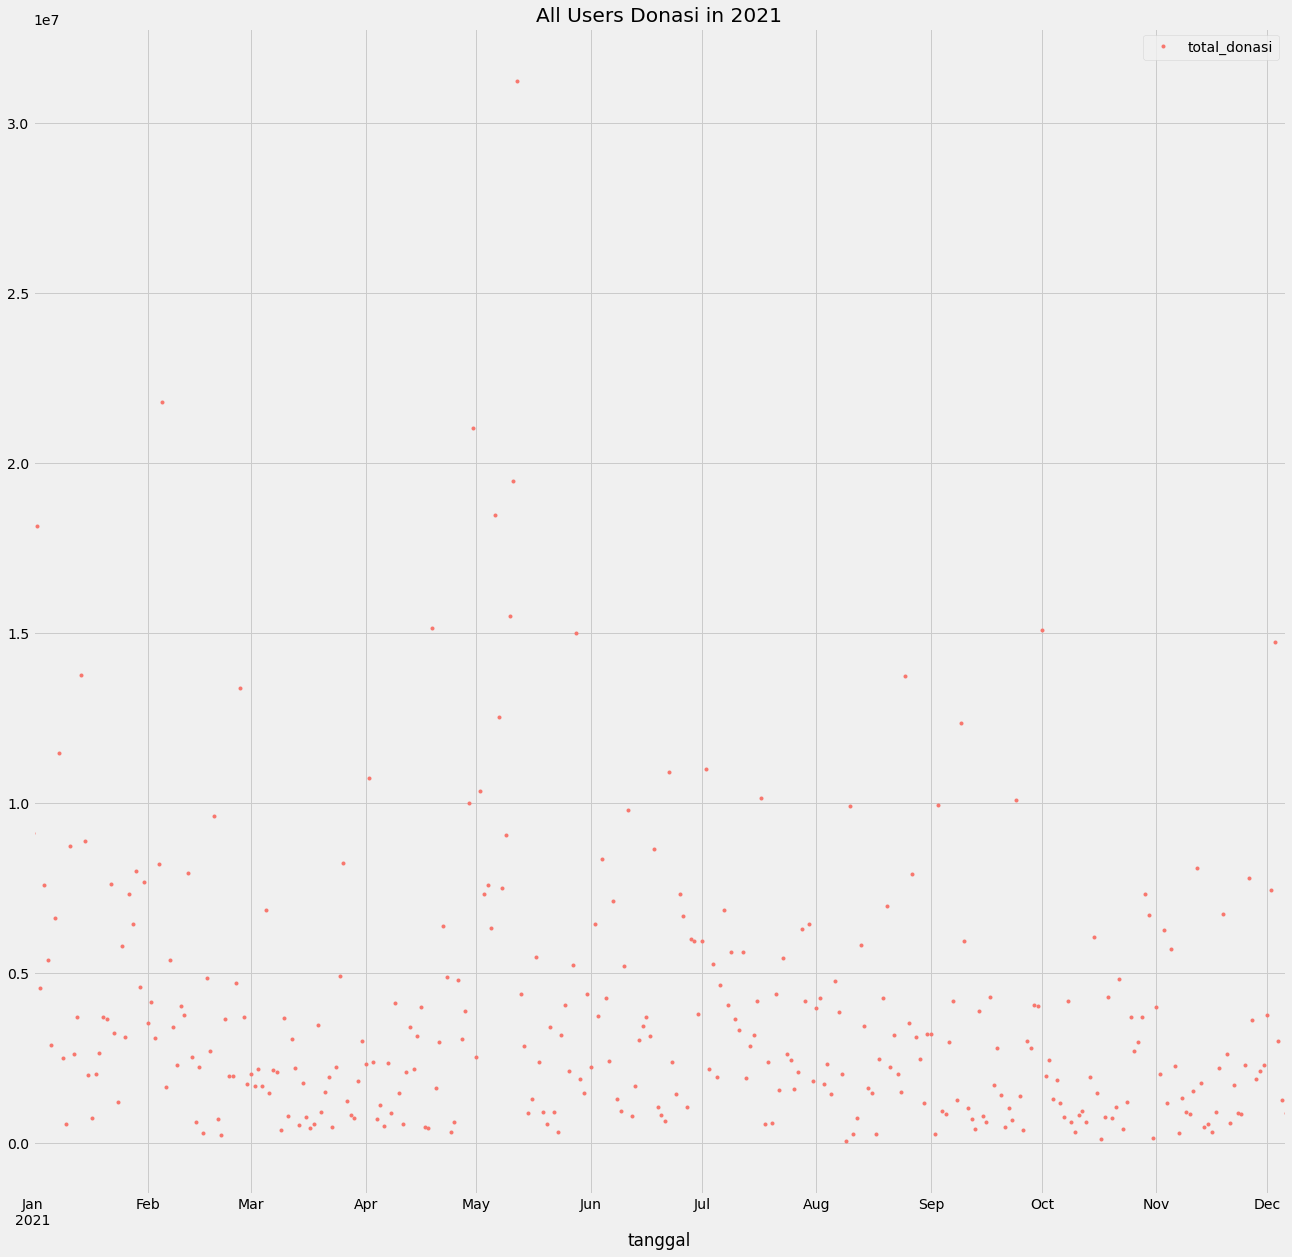

In [42]:
# Color pallete for plotting
color_pal = ["#F8766D", "#D39200", "#93AA00",
             "#00BA38", "#00C19F", "#00B9E3",
             "#619CFF", "#DB72FB"]
users_donasi.plot(style='.', figsize=(20,20), color=color_pal[0], title="All Users Donasi in 2021")
plt.show()

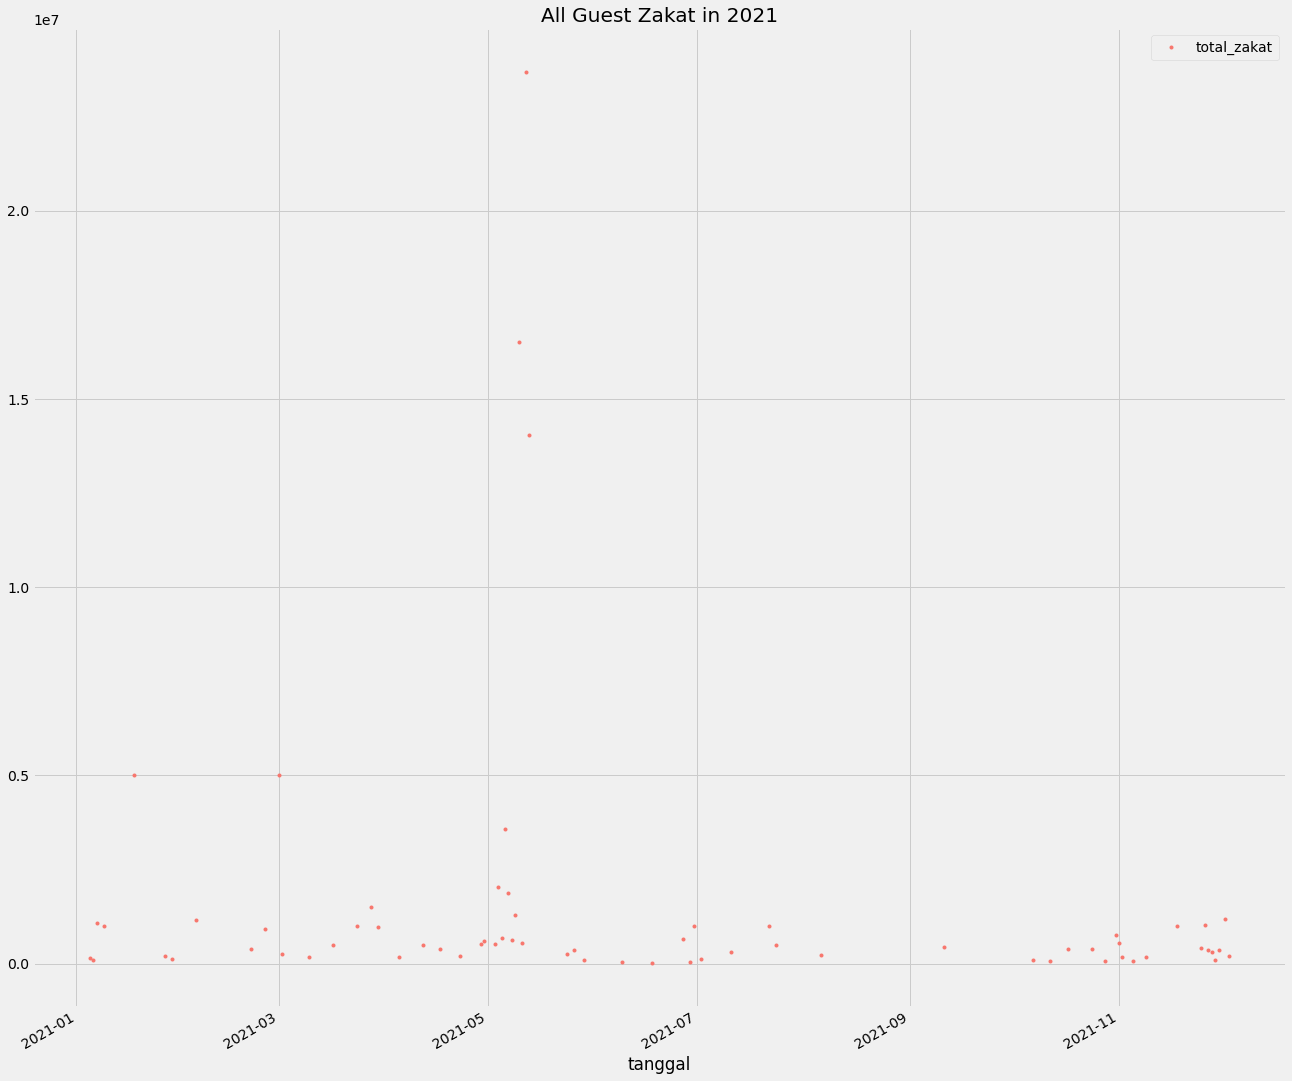

In [43]:
# Color pallete for plotting
color_pal = ["#F8766D", "#D39200", "#93AA00",
             "#00BA38", "#00C19F", "#00B9E3",
             "#619CFF", "#DB72FB"]
guest_zakat.plot(style='.', figsize=(20,20), color=color_pal[0], title="All Guest Zakat in 2021")
plt.show()

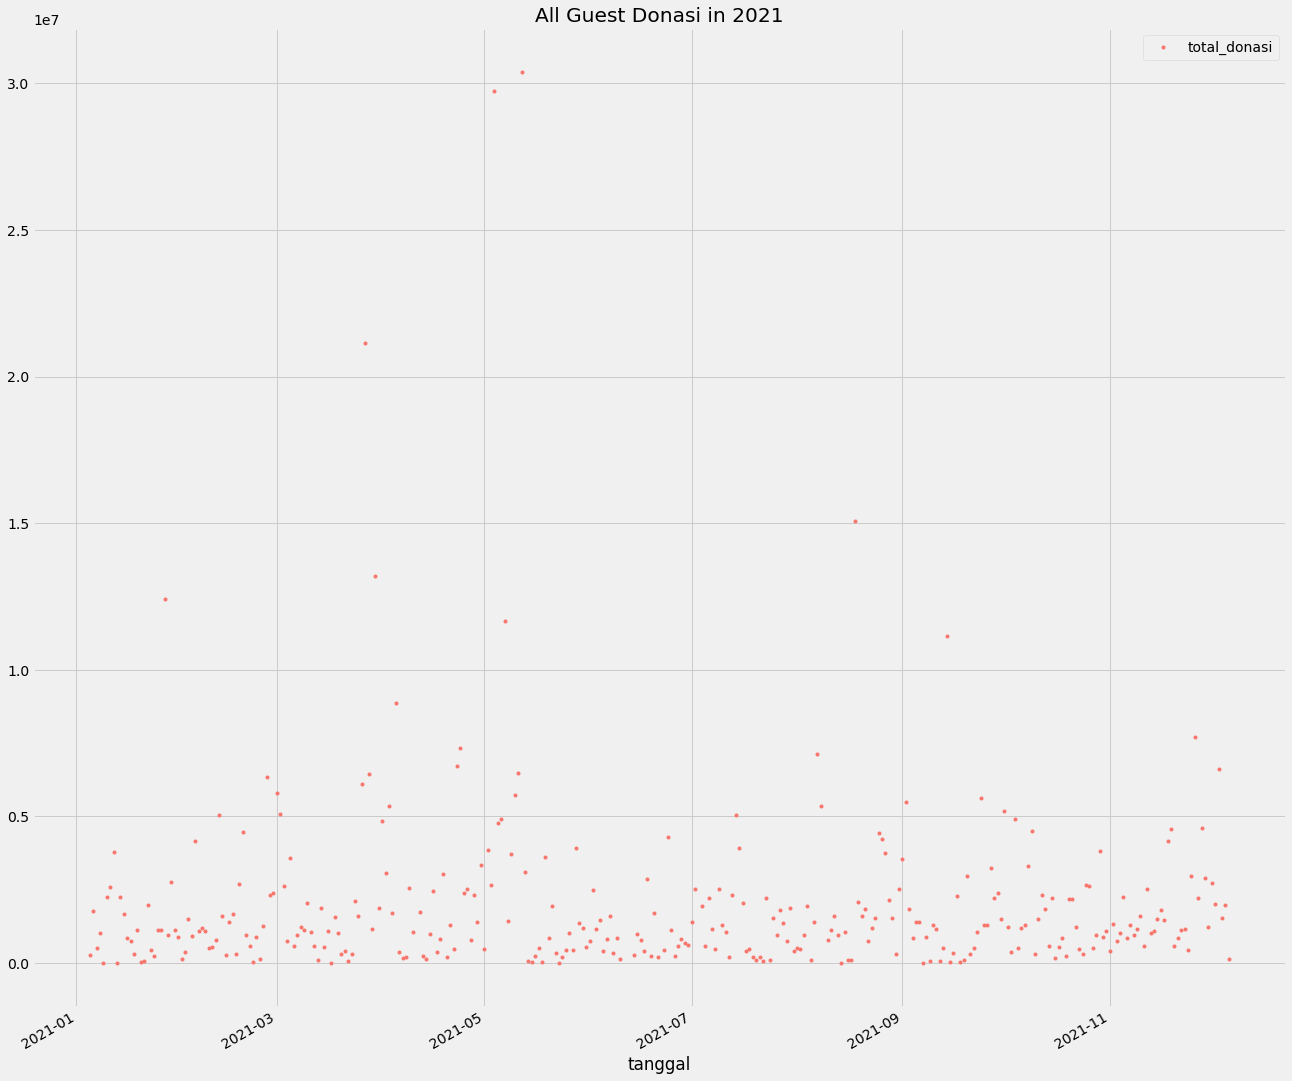

In [44]:
# Color pallete for plotting
color_pal = ["#F8766D", "#D39200", "#93AA00",
             "#00BA38", "#00C19F", "#00B9E3",
             "#619CFF", "#DB72FB"]
guest_donasi.plot(style='.', figsize=(20,20), color=color_pal[0], title="All Guest Donasi in 2021")
plt.show()

In [45]:
def create_features(df, label=None):
    """
    Creates time series features from datetime index.
    """
    df = df.copy()
    df['date'] = df.index
    df['dayofweek'] = df['date'].dt.dayofweek
    df['quarter'] = df['date'].dt.quarter
    df['month'] = df['date'].dt.month
    df['year'] = df['date'].dt.year
    df['dayofyear'] = df['date'].dt.dayofyear
    df['dayofmonth'] = df['date'].dt.day
    df['weekofyear'] = df['date'].dt.isocalendar().week
    
    X = df[['dayofweek','quarter','month','year',
           'dayofyear','dayofmonth','weekofyear']]
    if label:
        y = df[label]
        return X, y
    return X

In [46]:
type(guest_donasi)

pandas.core.frame.DataFrame

In [47]:
guest_donasi

,total_donasi
tanggal,
2021-01-05,275802.0
2021-01-06,1770315.0
2021-01-07,502000.0
2021-01-08,1040081.0
2021-01-09,20000.0
...,...
2021-12-02,2030424.0
2021-12-03,6612809.0
2021-12-04,1533750.0


In [48]:
list_of_online_sumbangan = [guest_donasi, guest_zakat, users_donasi, users_zakat]
list_of_name = ['Guest Donasi', 'Guest Zakat', 'Users Donasi', 'Users Zakat']

In [49]:
list_of_online_sumbangan[0].columns[0]

'total_donasi'

In [50]:
list_of_features = [None]*4

In [51]:
list_of_features

[None, None, None, None]

In [52]:
for idx, sumbangan in enumerate(list_of_online_sumbangan):
    list_of_features[idx] = create_features(sumbangan)
    list_of_features[idx][sumbangan.columns[0]] = sumbangan[sumbangan.columns[0]]

In [53]:
list_of_features[0].head()

,dayofweek,quarter,month,year,dayofyear,dayofmonth,weekofyear,total_donasi
tanggal,,,,,,,,
2021-01-05,1,1,1,2021,5,5,1,275802.0
2021-01-06,2,1,1,2021,6,6,1,1770315.0
2021-01-07,3,1,1,2021,7,7,1,502000.0
2021-01-08,4,1,1,2021,8,8,1,1040081.0
2021-01-09,5,1,1,2021,9,9,1,20000.0


In [54]:
list_of_features[0]

,dayofweek,quarter,month,year,dayofyear,dayofmonth,weekofyear,total_donasi
tanggal,,,,,,,,
2021-01-05,1,1,1,2021,5,5,1,275802.0
2021-01-06,2,1,1,2021,6,6,1,1770315.0
2021-01-07,3,1,1,2021,7,7,1,502000.0
2021-01-08,4,1,1,2021,8,8,1,1040081.0
2021-01-09,5,1,1,2021,9,9,1,20000.0
...,...,...,...,...,...,...,...,...
2021-12-02,3,4,12,2021,336,2,48,2030424.0
2021-12-03,4,4,12,2021,337,3,48,6612809.0
2021-12-04,5,4,12,2021,338,4,48,1533750.0


In [55]:
for sumbangan in list_of_online_sumbangan:
    sumbangan['hari'] = sumbangan.index.strftime("%A")

In [56]:
for i in range(len(list_of_online_sumbangan)):
    print(list_of_online_sumbangan[i].groupby('hari').hari.count())

hari
Friday       47
Monday       47
Saturday     46
Sunday       46
Thursday     48
Tuesday      47
Wednesday    48
Name: hari, dtype: int64
hari
Friday       11
Monday        9
Saturday      7
Sunday        9
Thursday     11
Tuesday      10
Wednesday    10
Name: hari, dtype: int64
hari
Friday       49
Monday       49
Saturday     49
Sunday       49
Thursday     48
Tuesday      48
Wednesday    48
Name: hari, dtype: int64
hari
Friday       37
Monday       26
Saturday     23
Sunday       16
Thursday     24
Tuesday      23
Wednesday    28
Name: hari, dtype: int64


In [57]:
list_of_features[0]

,dayofweek,quarter,month,year,dayofyear,dayofmonth,weekofyear,total_donasi
tanggal,,,,,,,,
2021-01-05,1,1,1,2021,5,5,1,275802.0
2021-01-06,2,1,1,2021,6,6,1,1770315.0
2021-01-07,3,1,1,2021,7,7,1,502000.0
2021-01-08,4,1,1,2021,8,8,1,1040081.0
2021-01-09,5,1,1,2021,9,9,1,20000.0
...,...,...,...,...,...,...,...,...
2021-12-02,3,4,12,2021,336,2,48,2030424.0
2021-12-03,4,4,12,2021,337,3,48,6612809.0
2021-12-04,5,4,12,2021,338,4,48,1533750.0


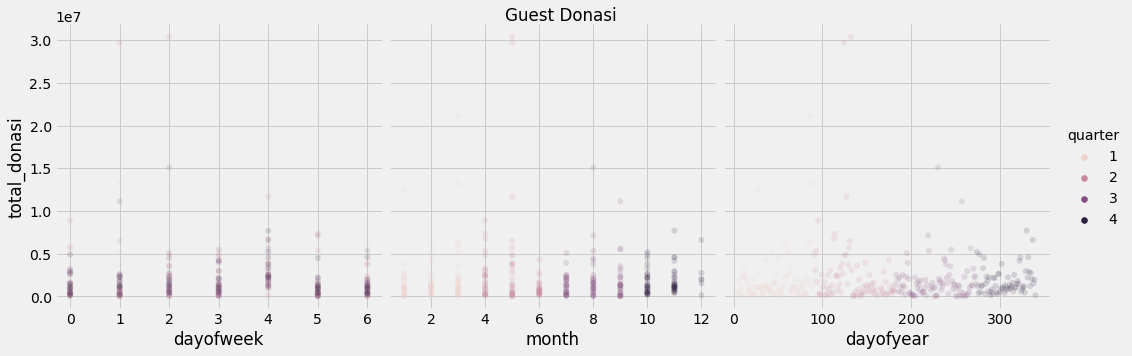

In [58]:
sns.pairplot(list_of_features[0],
             hue='quarter',
             x_vars=['dayofweek','month','dayofyear'],
             y_vars=list_of_features[0].columns[-1],
             height=5,
             plot_kws={'alpha':0.15, 'linewidth':0}
            )
plt.suptitle(list_of_name[0])
plt.show()

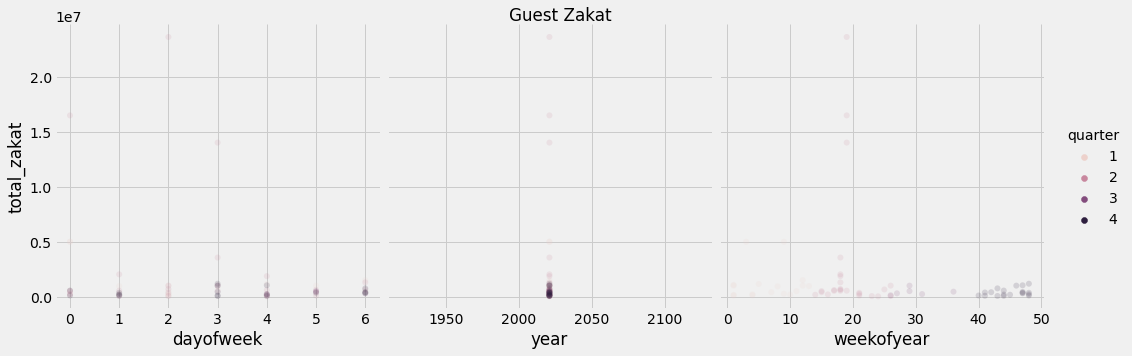

In [59]:
sns.pairplot(list_of_features[1],
             hue='quarter',
             x_vars=['dayofweek','year','weekofyear'],
             y_vars=list_of_features[1].columns[-1],
             height=5,
             plot_kws={'alpha':0.15, 'linewidth':0}
            )
plt.suptitle(list_of_name[1])
plt.show()

In [60]:
for sumbangan in list_of_online_sumbangan:
    sumbangan.drop(columns='hari', inplace = True)

In [61]:
list_of_online_sumbangan[0]

,total_donasi
tanggal,
2021-01-05,275802.0
2021-01-06,1770315.0
2021-01-07,502000.0
2021-01-08,1040081.0
2021-01-09,20000.0
...,...
2021-12-02,2030424.0
2021-12-03,6612809.0
2021-12-04,1533750.0


In [62]:
for i in range(4):
    list_of_online_sumbangan[i]= list_of_online_sumbangan[i].resample('D').sum()
    list_of_online_sumbangan[i]

<AxesSubplot:title={'center':'All Users Zakat in 2021'}, xlabel='tanggal', ylabel='total_zakat'>

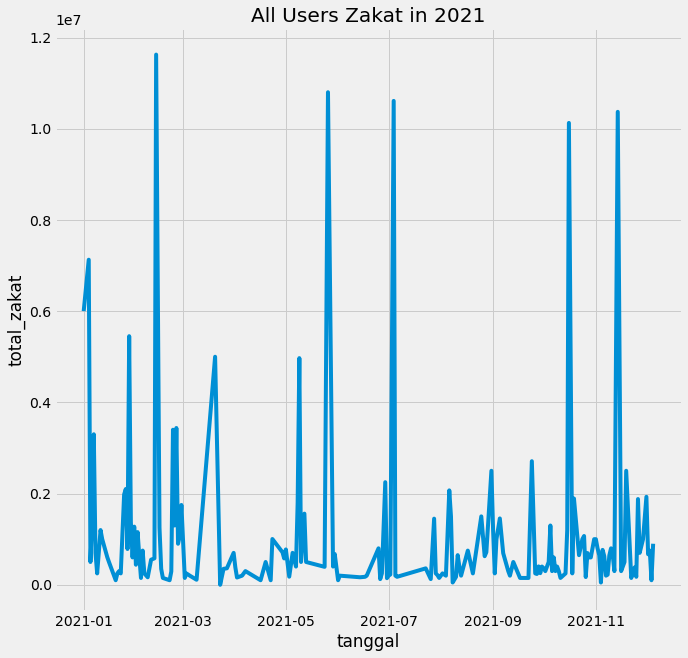

In [145]:
# Set the width and height of the figure
plt.figure(figsize=(10,10))

# Add title
plt.title("All Users Zakat in 2021")

# Line chart showing Sales over Date mapped by Category
sns.lineplot(x='tanggal',y='total_zakat', data=list_of_online_sumbangan[3])

<AxesSubplot:title={'center':'All Users Donasi in 2021'}, xlabel='tanggal', ylabel='total_donasi'>

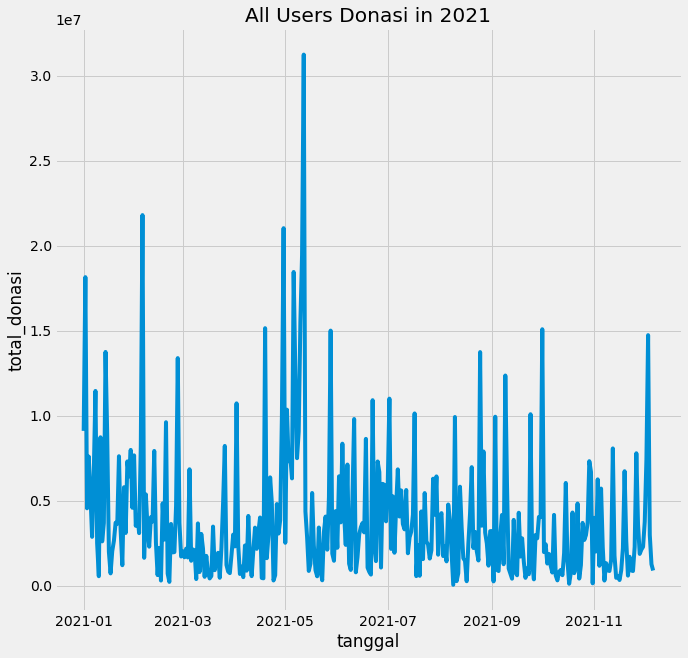

In [146]:
# Set the width and height of the figure
plt.figure(figsize=(10,10))

# Add title
plt.title("All Users Donasi in 2021")

# Line chart showing Sales over Date mapped by Categorya
sns.lineplot(x='tanggal',y='total_donasi', data=list_of_online_sumbangan[2])

<AxesSubplot:title={'center':'All Guest Zakat in 2021'}, xlabel='tanggal', ylabel='total_zakat'>

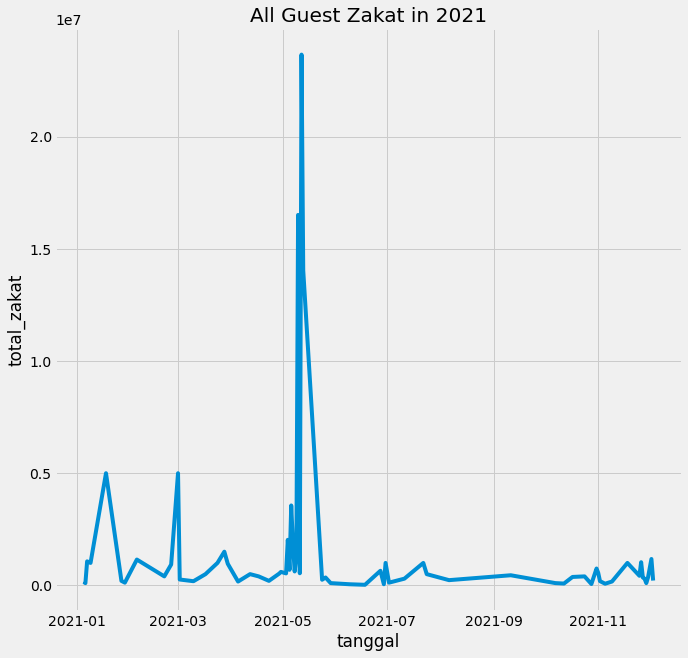

In [147]:
# Set the width and height of the figure
plt.figure(figsize=(10,10))

# Add title
plt.title("All Guest Zakat in 2021")

# Line chart showing Sales over Date mapped by Category
sns.lineplot(x='tanggal',y='total_zakat', data=list_of_online_sumbangan[1])

<AxesSubplot:title={'center':'All Guest Donasi in 2021'}, xlabel='tanggal', ylabel='total_donasi'>

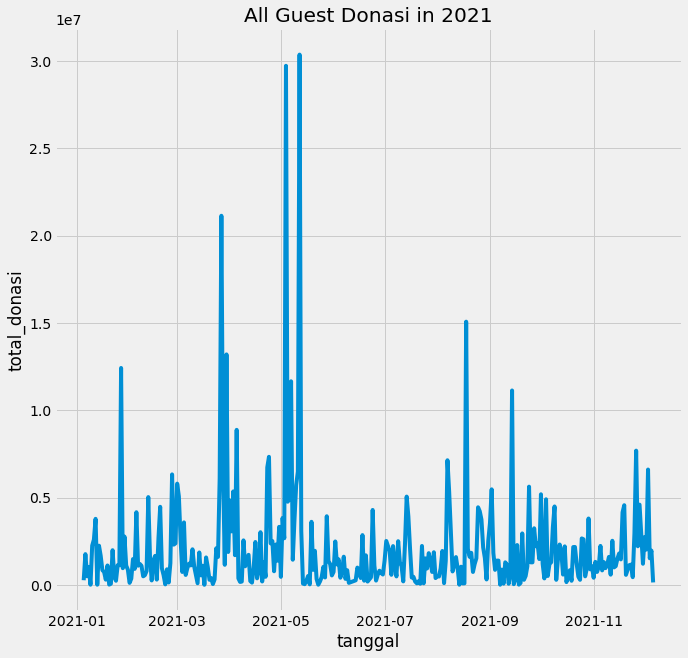

In [148]:
# Set the width and height of the figure
plt.figure(figsize=(10,10))

# Add title
plt.title("All Guest Donasi in 2021")

# Line chart showing Sales over Date mapped by Category
sns.lineplot(x='tanggal',y='total_donasi', data=list_of_online_sumbangan[0])

In [67]:
for i in range(4):
    nama_column = list_of_online_sumbangan[i].columns[0]
    list_of_online_sumbangan[i] = list_of_online_sumbangan[i][list_of_online_sumbangan[i][nama_column] != 0]
    list_of_online_sumbangan[i]

In [68]:
list_of_online_sumbangan[0].min()

total_donasi    15000.0
dtype: float64

<AxesSubplot:title={'center':'All Users Zakat in 2021'}, xlabel='tanggal', ylabel='total_zakat'>

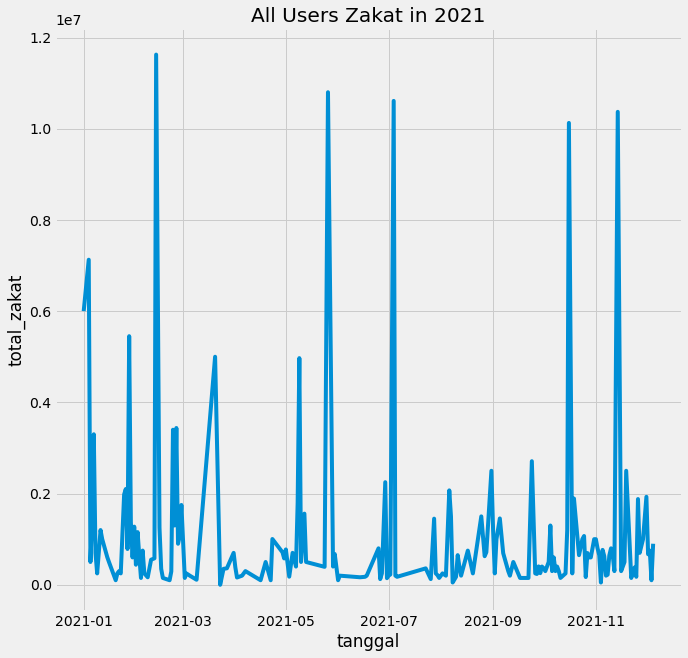

In [149]:
# Set the width and height of the figure
plt.figure(figsize=(10,10))

# Add title
plt.title("All Users Zakat in 2021")

# Line chart showing Sales over Date mapped by Category
sns.lineplot(x='tanggal',y='total_zakat', data=list_of_online_sumbangan[3])

<AxesSubplot:title={'center':'All Users Donasi in 2021'}, xlabel='tanggal', ylabel='total_donasi'>

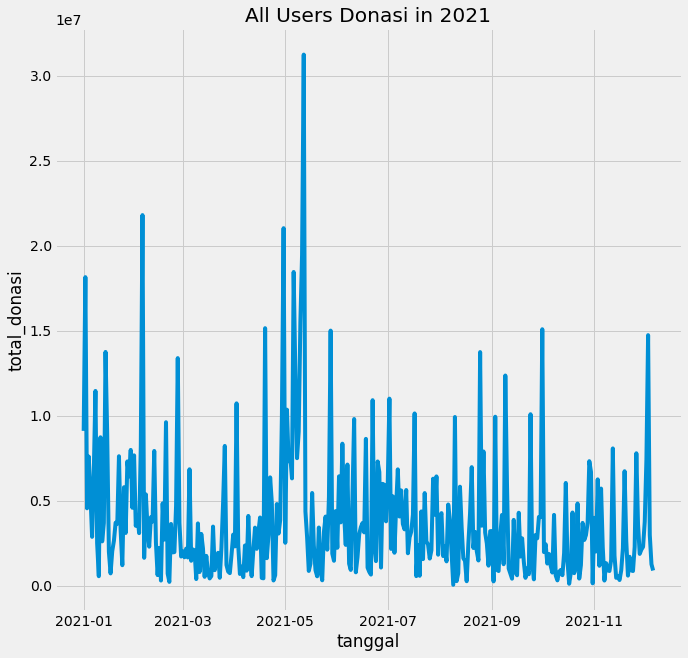

In [150]:
# Set the width and height of the figure
plt.figure(figsize=(10,10))

# Add title
plt.title("All Users Donasi in 2021")

# Line chart showing Sales over Date mapped by Categorya
sns.lineplot(x='tanggal',y='total_donasi', data=list_of_online_sumbangan[2])

<AxesSubplot:title={'center':'All Guest Zakat in 2021'}, xlabel='tanggal', ylabel='total_zakat'>

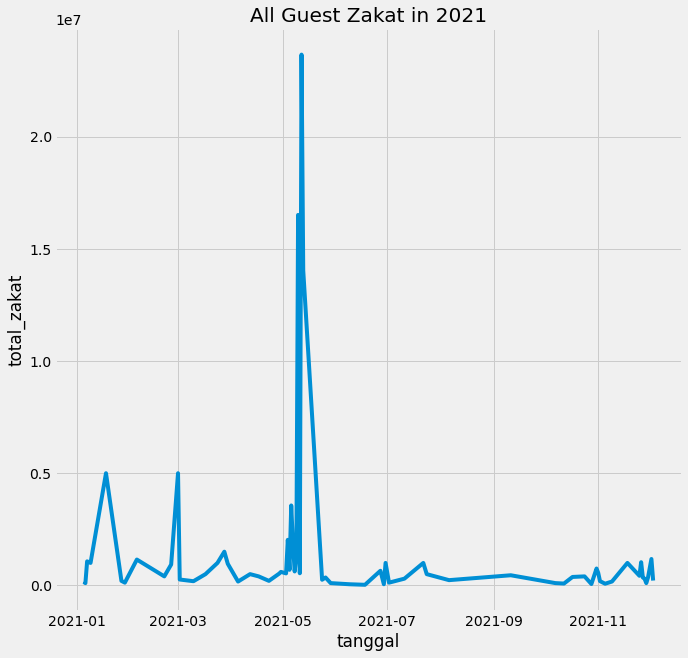

In [151]:
# Set the width and height of the figure
plt.figure(figsize=(10,10))

# Add title
plt.title("All Guest Zakat in 2021")

# Line chart showing Sales over Date mapped by Category
sns.lineplot(x='tanggal',y='total_zakat', data=list_of_online_sumbangan[1])

<AxesSubplot:title={'center':'All Guest Donasi in 2021'}, xlabel='tanggal', ylabel='total_donasi'>

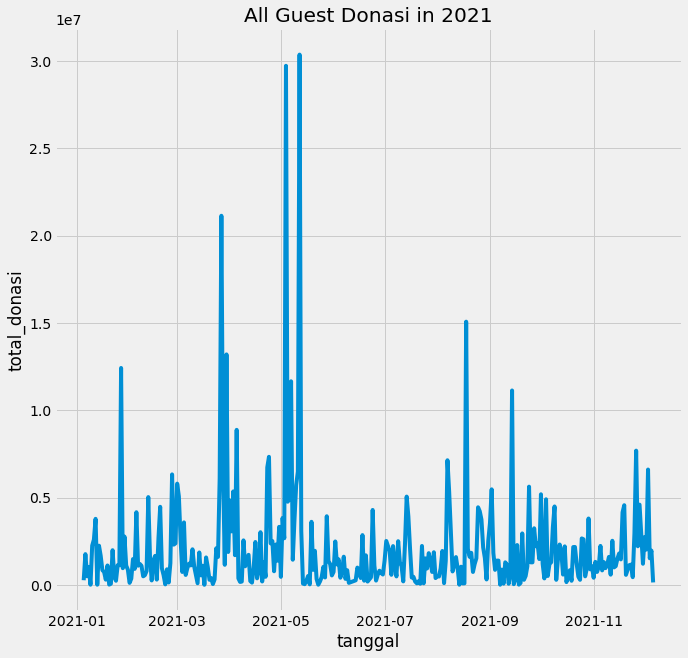

In [152]:
# Set the width and height of the figure
plt.figure(figsize=(10,10))

# Add title
plt.title("All Guest Donasi in 2021")

# Line chart showing Sales over Date mapped by Category
sns.lineplot(x='tanggal',y='total_donasi', data=list_of_online_sumbangan[0])

# (Kalau ada) Buang outlier

In [73]:
from scipy.stats import zscore

In [74]:
list_of_new_df = []

In [75]:
for sumbangan in list_of_online_sumbangan:
    z_scores = zscore(sumbangan)
    abs_z_scores = np.abs(z_scores)
    filtered_entries = (abs_z_scores < 3).all(axis=1)
    list_of_new_df.append(sumbangan[filtered_entries])

In [76]:
list_of_new_df[1].max()

total_zakat    5000000.0
dtype: float64

In [77]:
list_of_online_sumbangan[1].max()

total_zakat    23665892.0
dtype: float64

In [78]:
list_of_new_df[2]

,total_donasi
tanggal,
2021-01-01,9104921.0
2021-01-03,4549815.0
2021-01-04,7592243.0
2021-01-05,5388900.0
2021-01-06,2870662.0
...,...
2021-12-02,7427500.0
2021-12-03,14735138.0
2021-12-04,2980042.0


# (Kalau masih ada outlier) buang pakai cara manual tadi

In [79]:
list_of_new_df[0] = list_of_online_sumbangan[0].loc[list_of_online_sumbangan[0].total_donasi <= 1000000]

## Split data, data test 20% dari total data

In [80]:
test_ratio = 0.2
for idx,sumbangan in enumerate(list_of_new_df):
    number = idx+1
    
    test_set_size = int(len(sumbangan) * test_ratio)
    
    globals()['donation%s' % number+'_train'] = sumbangan[0:-test_set_size].copy()
    globals()['donation%s' % number+'_test'] = sumbangan[-test_set_size:].copy()

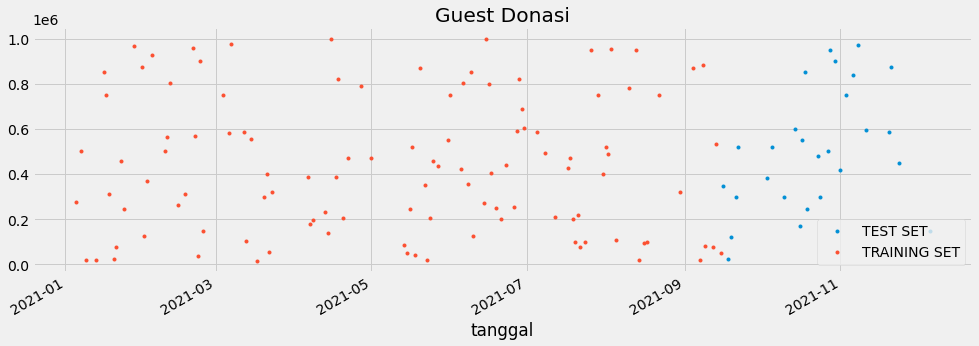

In [81]:
# Plot train and test so you can see where we have split
donation1_test \
    .rename(columns={donation1_test.columns[0]: 'TEST SET'}) \
    .join(donation1_train.rename(columns={donation1_train.columns[0]: 'TRAINING SET'}),
          how='outer') \
    .plot.line(figsize=(15,5), title=list_of_name[0], style='.')
plt.show()

In [82]:
# Format data for prophet model using ds and y
donation1_train.reset_index() \
    .rename(columns={'tanggal':'ds',
                     donation1_train.columns[0]:'y'}).head()

,ds,y
0,2021-01-05,275802.0
1,2021-01-07,502000.0
2,2021-01-09,20000.0
3,2021-01-13,20000.0
4,2021-01-16,853000.0


In [83]:
for idx in range(4):
    number = idx+1
    globals()['donation%s' % number+'_train'].reset_index(inplace=True)
    globals()['donation%s' % number+'_train'].rename(columns={
        globals()['donation%s' % number+'_train'].columns[0]:'ds',
        globals()['donation%s' % number+'_train'].columns[1]:'y'},inplace=True)
    
    missing_values_count = globals()['donation%s' % number+'_train'].isnull().sum()
    print(number)
    print(missing_values_count[0:2])

1
ds    0
y     0
dtype: int64
2
ds    0
y     0
dtype: int64
3
ds    0
y     0
dtype: int64
4
ds    0
y     0
dtype: int64


In [84]:
donation3_test

,total_donasi
tanggal,
2021-10-02,1974500.0
2021-10-03,2435475.0
2021-10-04,1300000.0
2021-10-05,1860981.0
2021-10-06,1170000.0
...,...
2021-12-02,7427500.0
2021-12-03,14735138.0
2021-12-04,2980042.0


# MODELLING

In [85]:
# Setup and train model and fit
for idx in range(4):
    number = idx+1
    print(number)
    globals()['model%s' % number] = Prophet()
    globals()['model%s' % number].fit(globals()['donation%s' % number+'_train'])

1
Initial log joint probability = -11.2572
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
2      99       78.6695    8.5593e-07       107.373      0.6474      0.6474      135   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     122       78.6698    6.8742e-09       92.3258      0.1752      0.1752      162   
Optimization terminated normally: 
  Convergence detected: absolute parameter change was below tolerance


Initial log joint probability = -18.2583
3
Iteration  1. Log joint probability =    13.9035. Improved by 32.1618.
Iteration  2. Log joint probability =     51.546. Improved by 37.6426.
Iteration  3. Log joint probability =    56.7628. Improved by 5.21675.
Iteration  4. Log joint probability =    56.8377. Improved by 0.0749255.
Iteration  5. Log joint probability =    56.8564. Improved by 0.0187394.
Iteration  6. Log joint probability =    56.9388. Improved by 0.082339.
Iteration  7. Log

In [86]:
for idx in range(4):
    number = idx+1
    globals()['donation%s' % number+'_test'].reset_index(inplace=True)
    globals()['donation%s' % number+'_test'].rename(columns={
        globals()['donation%s' % number+'_test'].columns[0]:'ds',
        globals()['donation%s' % number+'_test'].columns[1]:'y'},inplace=True)
    
    missing_values_count = globals()['donation%s' % number+'_test'].isnull().sum()
    print(number)
    print(missing_values_count[0:2])

1
ds    0
y     0
dtype: int64
2
ds    0
y     0
dtype: int64
3
ds    0
y     0
dtype: int64
4
ds    0
y     0
dtype: int64


In [87]:
donation1_test

,ds,y
0,2021-09-16,345000.0
1,2021-09-18,25000.0
2,2021-09-19,120000.0
3,2021-09-21,300000.0
4,2021-09-22,520000.0
5,2021-10-03,380503.0
6,2021-10-05,520235.0
7,2021-10-10,300000.0
8,2021-10-14,600000.0
9,2021-10-16,170000.0


In [88]:
for idx in range(4):
    number = idx+1
    globals()['donation%s' % number+'_new_test'] = pd.DataFrame()
    globals()['donation%s' % number+'_new_test']['ds'] = globals()['donation%s' % number+'_test']['ds']

In [89]:
donation1_new_test

,ds
0,2021-09-16
1,2021-09-18
2,2021-09-19
3,2021-09-21
4,2021-09-22
5,2021-10-03
6,2021-10-05
7,2021-10-10
8,2021-10-14
9,2021-10-16


In [90]:
# Predict on training set with model
for idx in range(4):
    number = idx+1
    globals()['donation%s' % number+'_test_fcst'] = globals()['model%s' % number].predict(globals()['donation%s' % number+'_new_test'])
    print(number)

1
2
3
4


In [91]:
donation1_test_fcst.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2021-09-16,382346.372712,93335.205880,827234.350607,382346.372712,382346.372712,65512.047108,65512.047108,65512.047108,65512.047108,65512.047108,65512.047108,0.0,0.0,0.0,447858.419820
1,2021-09-18,381485.463633,-63303.495450,675892.828009,381485.463615,381485.463651,-51904.617155,-51904.617155,-51904.617155,-51904.617155,-51904.617155,-51904.617155,0.0,0.0,0.0,329580.846478
2,2021-09-19,381055.009093,90530.254159,864815.072377,381055.009028,381055.009162,86586.877521,86586.877521,86586.877521,86586.877521,86586.877521,86586.877521,0.0,0.0,0.0,467641.886614
3,2021-09-21,380194.100014,39957.786135,800056.037813,380194.099837,380194.100221,29851.058921,29851.058921,29851.058921,29851.058921,29851.058921,29851.058921,0.0,0.0,0.0,410045.158935
4,2021-09-22,379763.645474,-83084.566644,643934.302753,379763.645235,379763.645789,-87793.051437,-87793.051437,-87793.051437,-87793.051437,-87793.051437,-87793.051437,0.0,0.0,0.0,291970.594037


In [92]:
donation1_test.head()

,ds,y
0,2021-09-16,345000.0
1,2021-09-18,25000.0
2,2021-09-19,120000.0
3,2021-09-21,300000.0
4,2021-09-22,520000.0


In [93]:
help(model1.plot)

Help on method plot in module fbprophet.forecaster:

plot(fcst, ax=None, uncertainty=True, plot_cap=True, xlabel='ds', ylabel='y', figsize=(10, 6)) method of fbprophet.forecaster.Prophet instance
    Plot the Prophet forecast.
    
    Parameters
    ----------
    fcst: pd.DataFrame output of self.predict.
    ax: Optional matplotlib axes on which to plot.
    uncertainty: Optional boolean to plot uncertainty intervals.
    plot_cap: Optional boolean indicating if the capacity should be shown
        in the figure, if available.
    xlabel: Optional label name on X-axis
    ylabel: Optional label name on Y-axis
    figsize: Optional tuple width, height in inches.
    
    Returns
    -------
    A matplotlib figure.



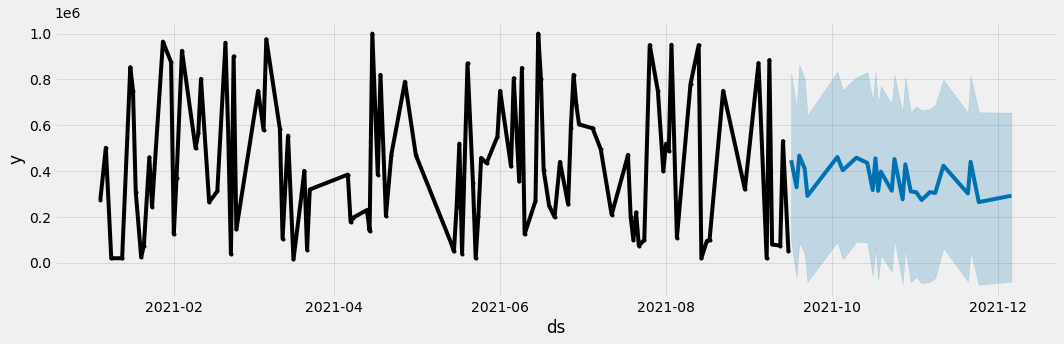

In [94]:
# Plot the forecast
f, ax = plt.subplots(1)
f.set_figheight(5)
f.set_figwidth(15)
ax.plot(donation1_train['ds'], donation1_train['y'], color='black')
fig = model1.plot(donation1_test_fcst,
                 ax=ax)
plt.show()

In [95]:
donation1_test

,ds,y
0,2021-09-16,345000.0
1,2021-09-18,25000.0
2,2021-09-19,120000.0
3,2021-09-21,300000.0
4,2021-09-22,520000.0
5,2021-10-03,380503.0
6,2021-10-05,520235.0
7,2021-10-10,300000.0
8,2021-10-14,600000.0
9,2021-10-16,170000.0


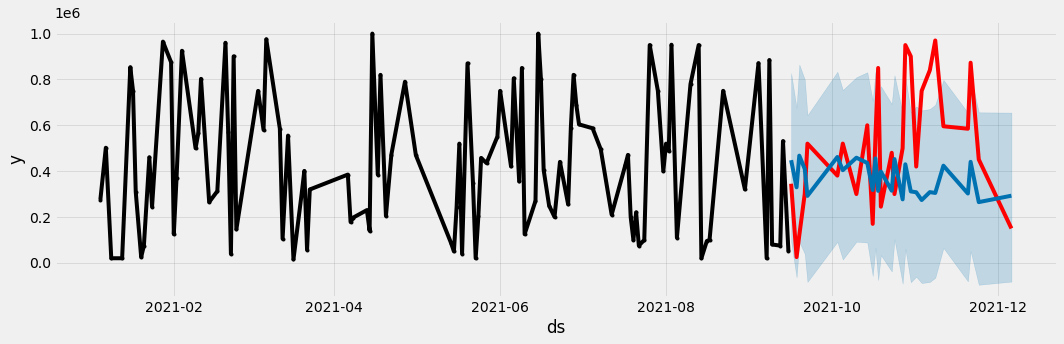

In [96]:
# Plot the forecast with the actuals
f, ax = plt.subplots(1)
f.set_figheight(5)
f.set_figwidth(15)
ax.plot(donation1_train['ds'], donation1_train['y'], color='black')
ax.plot(donation1_test['ds'], donation1_test['y'], color='red')
fig = model1.plot(donation1_test_fcst, ax=ax)

In [97]:
((len(donation1_new_test) - 9)/ len(donation1_new_test)) * 100

66.66666666666666

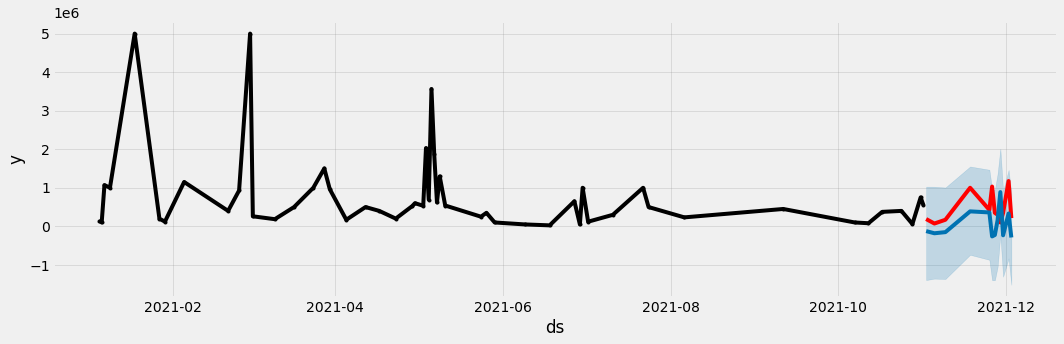

In [98]:
# Plot the forecast with the actuals
f, ax = plt.subplots(1)
f.set_figheight(5)
f.set_figwidth(15)
ax.plot(donation2_train['ds'], donation2_train['y'], color='black')
ax.plot(donation2_test['ds'], donation2_test['y'], color='red')
fig = model2.plot(donation2_test_fcst, ax=ax)

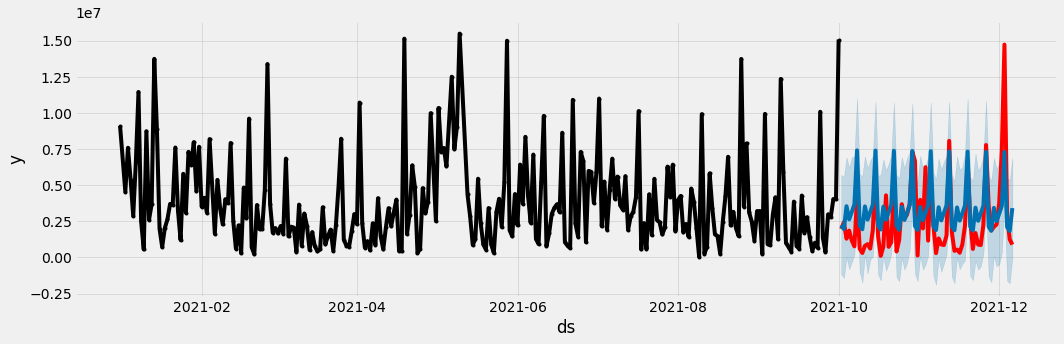

In [99]:
# Plot the forecast with the actuals
f, ax = plt.subplots(1)
f.set_figheight(5)
f.set_figwidth(15)
ax.plot(donation3_train['ds'], donation3_train['y'], color='black')
ax.plot(donation3_test['ds'], donation3_test['y'], color='red')
fig = model3.plot(donation3_test_fcst, ax=ax)

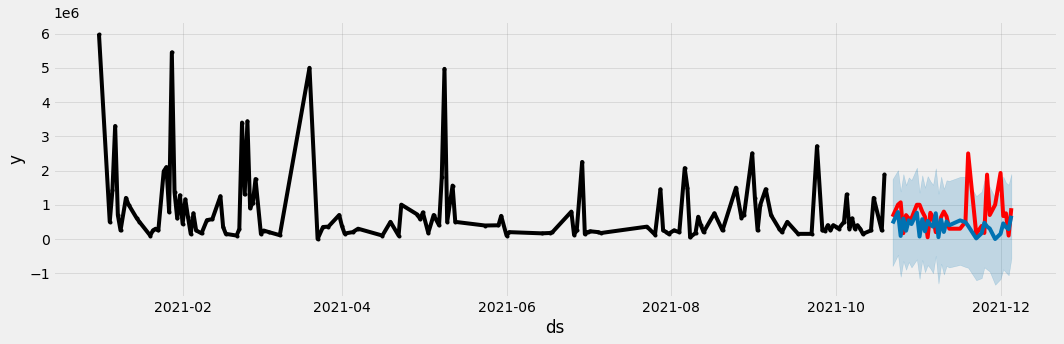

In [100]:
# Plot the forecast with the actuals
f, ax = plt.subplots(1)
f.set_figheight(5)
f.set_figwidth(15)
ax.plot(donation4_train['ds'], donation4_train['y'], color='black')
ax.plot(donation4_test['ds'], donation4_test['y'], color='red')
fig = model4.plot(donation4_test_fcst, ax=ax)

In [101]:
list_of_new_df[0]

,total_donasi
tanggal,
2021-01-05,275802.0
2021-01-07,502000.0
2021-01-09,20000.0
2021-01-13,20000.0
2021-01-16,853000.0
...,...
2021-11-11,595700.0
2021-11-20,585000.0
2021-11-21,873000.0


In [102]:
for i in range(4):
    number = i + 1
    globals()['df%s' % number+'_test'] = pd.DataFrame(columns = ['ds'])
    globals()['df%s' % number+'_test']['ds'] = pd.date_range(start=list_of_new_df[0].index.max() + dt.timedelta(days=1) , periods = 30, freq='D')

In [103]:
list_of_new_df[0].index.max() + dt.timedelta(days=1)

Timestamp('2021-12-07 00:00:00')

In [104]:
list_of_name[0]

'Guest Donasi'

In [105]:
df1_test

,ds
0,2021-12-07
1,2021-12-08
2,2021-12-09
3,2021-12-10
4,2021-12-11
5,2021-12-12
6,2021-12-13
7,2021-12-14
8,2021-12-15
9,2021-12-16


In [106]:
# Predict on training set with model
for idx in range(4):
    number = idx+1
    globals()['donation%s' % number+'_after_last_day'] = globals()['model%s' % number].predict(globals()['df%s' % number+'_test'])
    print(number)

1
2
3
4


In [107]:
donation1_after_last_day

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2021-12-07,347049.100451,19.663269,755881.877939,347049.081107,347049.119338,29851.058921,29851.058921,29851.058921,29851.058921,29851.058921,29851.058921,0.0,0.0,0.0,376900.159372
1,2021-12-08,346618.645912,-100871.770231,639789.200866,346618.626286,346618.664956,-87793.051437,-87793.051437,-87793.051437,-87793.051437,-87793.051437,-87793.051437,0.0,0.0,0.0,258825.594475
2,2021-12-09,346188.191372,45133.315211,801286.578870,346188.171156,346188.210706,65512.047108,65512.047108,65512.047108,65512.047108,65512.047108,65512.047108,0.0,0.0,0.0,411700.238480
3,2021-12-10,345757.736832,-15916.020451,716705.913114,345757.716233,345757.756502,12425.633682,12425.633682,12425.633682,12425.633682,12425.633682,12425.633682,0.0,0.0,0.0,358183.370515
4,2021-12-11,345327.282292,-65533.001605,677125.172236,345327.261278,345327.302382,-51904.617155,-51904.617155,-51904.617155,-51904.617155,-51904.617155,-51904.617155,0.0,0.0,0.0,293422.665138
5,2021-12-12,344896.827753,23378.934291,816496.024652,344896.806444,344896.848242,86586.877521,86586.877521,86586.877521,86586.877521,86586.877521,86586.877521,0.0,0.0,0.0,431483.705273
6,2021-12-13,344466.373213,-72893.950242,676620.127045,344466.351617,344466.394085,-54677.948640,-54677.948640,-54677.948640,-54677.948640,-54677.948640,-54677.948640,0.0,0.0,0.0,289788.424573
7,2021-12-14,344035.918673,16014.884111,759532.700793,344035.896848,344035.939909,29851.058921,29851.058921,29851.058921,29851.058921,29851.058921,29851.058921,0.0,0.0,0.0,373886.977594
8,2021-12-15,343605.464133,-110779.656954,622209.381979,343605.441957,343605.485757,-87793.051437,-87793.051437,-87793.051437,-87793.051437,-87793.051437,-87793.051437,0.0,0.0,0.0,255812.412697
9,2021-12-16,343175.009594,14064.106037,780768.936893,343174.987174,343175.031771,65512.047108,65512.047108,65512.047108,65512.047108,65512.047108,65512.047108,0.0,0.0,0.0,408687.056701


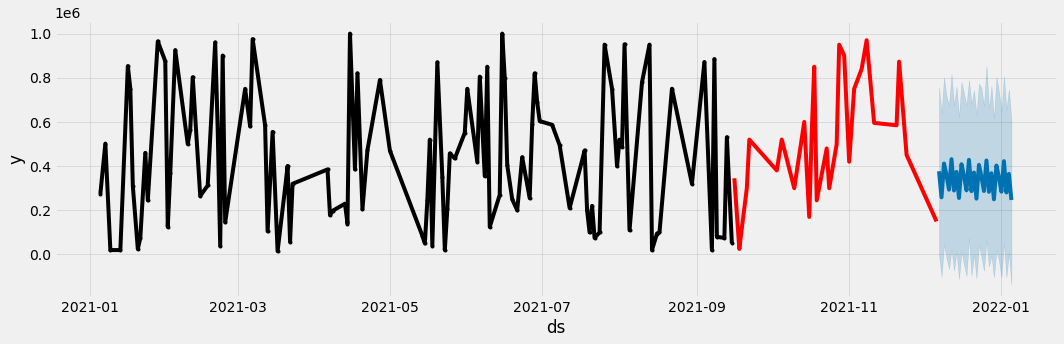

In [108]:
# Plot the forecast
f, ax = plt.subplots(1)
f.set_figheight(5)
f.set_figwidth(15)
ax.plot(donation1_train['ds'], donation1_train['y'], color='black')
ax.plot(donation1_test['ds'], donation1_test['y'], color='r')
fig = model1.plot(donation1_after_last_day,
                 ax=ax)
plt.show()

In [109]:
list_of_name[3]

'Users Zakat'

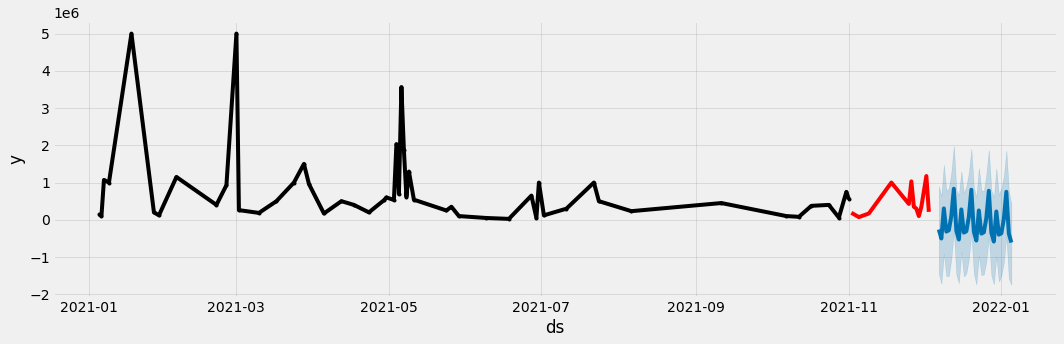

In [110]:
# Plot the forecast
f, ax = plt.subplots(1)
f.set_figheight(5)
f.set_figwidth(15)
ax.plot(donation2_train['ds'], donation2_train['y'], color='black')
ax.plot(donation2_test['ds'], donation2_test['y'], color='r')
fig = model2.plot(donation2_after_last_day,
                 ax=ax)
plt.show()

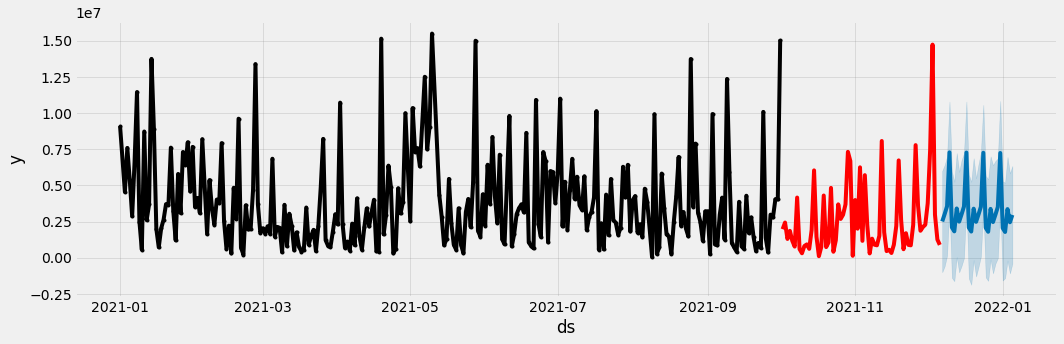

In [111]:
# Plot the forecast
f, ax = plt.subplots(1)
f.set_figheight(5)
f.set_figwidth(15)
ax.plot(donation3_train['ds'], donation3_train['y'], color='black')
ax.plot(donation3_test['ds'], donation3_test['y'], color='r')
fig = model3.plot(donation3_after_last_day,
                 ax=ax)
plt.show()

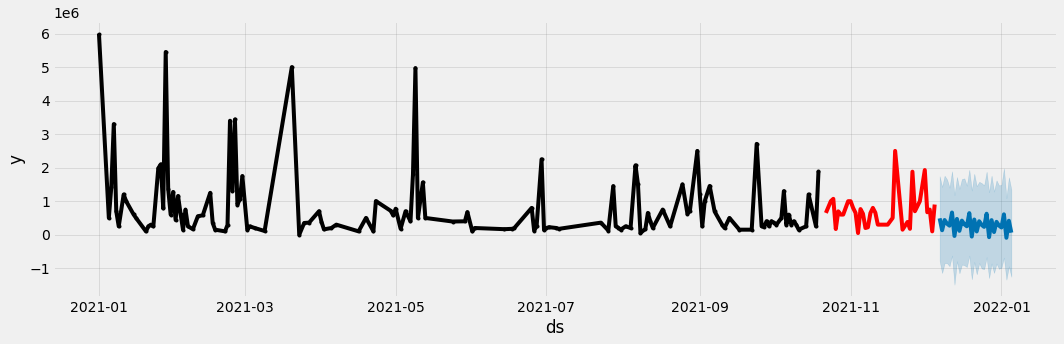

In [112]:
# Plot the forecast
f, ax = plt.subplots(1)
f.set_figheight(5)
f.set_figwidth(15)
ax.plot(donation4_train['ds'], donation4_train['y'], color='black')
ax.plot(donation4_test['ds'], donation4_test['y'], color='r')
fig = model4.plot(donation4_after_last_day,
                 ax=ax)
plt.show()

In [113]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
plt.style.use('fivethirtyeight')

In [114]:
donation1_test

,ds,y
0,2021-09-16,345000.0
1,2021-09-18,25000.0
2,2021-09-19,120000.0
3,2021-09-21,300000.0
4,2021-09-22,520000.0
5,2021-10-03,380503.0
6,2021-10-05,520235.0
7,2021-10-10,300000.0
8,2021-10-14,600000.0
9,2021-10-16,170000.0


In [115]:
def mean_absolute_percentage_error(y_true, y_pred): 
    """Calculates MAPE given y_true and y_pred"""
    
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [116]:
mse_li = []
for idx in range (4):
    number = idx+1
    nilai_mse = mean_squared_error(y_true=globals()['donation%s' % number+'_test']['y'],
                   y_pred=globals()['donation%s' % number+'_test_fcst']['yhat'])
    mse_li.append(nilai_mse)
    print("{}, MSE = {}".format(list_of_name[idx], nilai_mse))

print("Total rata rata MSE dari 4 Model {}".format(sum(mse_li)/len(mse_li)))

Guest Donasi, MSE = 101332276730.10593
Guest Zakat, MSE = 382528815803.17847
Users Donasi, MSE = 4161525125693.2153
Users Zakat, MSE = 451900689649.4461
Total rata rata MSE dari 4 Model 1274321726968.9866


In [117]:
mape_li = []
for idx in range(4):
    number = idx+1
    nilai_mape = mean_absolute_percentage_error(y_true=globals()['donation%s' % number+'_test']['y'],
                   y_pred=globals()['donation%s' % number+'_test_fcst']['yhat'])
    mape_li.append(nilai_mape)
    print("{}, MAPE = {}".format(list_of_name[idx], nilai_mape))

print("Total rata rata MAPE dari 4 Model {}".format(sum(mape_li)/len(mape_li)))

Guest Donasi, MAPE = 100.26138967790392
Guest Zakat, MAPE = 198.2680705597584
Users Donasi, MAPE = 185.5702912650832
Users Zakat, MAPE = 98.60854392292094
Total rata rata MAPE dari 4 Model 145.6770738564166


# Modelling XGBoost


In [118]:
import xgboost as xgb
from xgboost import plot_importance, plot_tree

In [119]:
def create_features1(df, label=None):
    """
    Creates time series features from datetime index
    """
    df['date'] = df.index
    df['hour'] = df['date'].dt.hour
    df['dayofweek'] = df['date'].dt.dayofweek
    df['quarter'] = df['date'].dt.quarter
    df['month'] = df['date'].dt.month
    df['year'] = df['date'].dt.year
    df['dayofyear'] = df['date'].dt.dayofyear
    df['dayofmonth'] = df['date'].dt.day
    df['weekofyear'] = df['date'].dt.weekofyear
    
    X = df[['hour','dayofweek','quarter','month','year',
           'dayofyear','dayofmonth','weekofyear']]
    if label:
        y = df[label]
        return X, y
    return X

In [120]:
donation1_train.set_index('ds',inplace=True)
donation2_train.set_index('ds',inplace=True)
donation3_train.set_index('ds',inplace=True)
donation4_train.set_index('ds',inplace=True)

In [121]:
donation1_test.set_index('ds',inplace=True)
donation2_test.set_index('ds',inplace=True)
donation3_test.set_index('ds',inplace=True)
donation4_test.set_index('ds',inplace=True)

In [122]:
donation1_train

,y
ds,
2021-01-05,275802.0
2021-01-07,502000.0
2021-01-09,20000.0
2021-01-13,20000.0
2021-01-16,853000.0
...,...
2021-09-08,884500.0
2021-09-09,80000.0
2021-09-12,75000.0


In [123]:
for i in range(4):
    number = i + 1
    globals()['X%s' % number+'_train'], globals()['y%s' % number+'_train'] = create_features1(globals()['donation%s' % number+'_train'], label='y')
    globals()['X%s' % number+'_test'], globals()['y%s' % number+'_test'] = create_features1(globals()['donation%s' % number+'_test'], label='y')

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:13: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  del sys.path[0]


In [124]:
donation1_train

,y,date,hour,dayofweek,quarter,month,year,dayofyear,dayofmonth,weekofyear
ds,,,,,,,,,,
2021-01-05,275802.0,2021-01-05,0,1,1,1,2021,5,5,1
2021-01-07,502000.0,2021-01-07,0,3,1,1,2021,7,7,1
2021-01-09,20000.0,2021-01-09,0,5,1,1,2021,9,9,1
2021-01-13,20000.0,2021-01-13,0,2,1,1,2021,13,13,2
2021-01-16,853000.0,2021-01-16,0,5,1,1,2021,16,16,2
...,...,...,...,...,...,...,...,...,...,...
2021-09-08,884500.0,2021-09-08,0,2,3,9,2021,251,8,36
2021-09-09,80000.0,2021-09-09,0,3,3,9,2021,252,9,36
2021-09-12,75000.0,2021-09-12,0,6,3,9,2021,255,12,36


In [125]:
X1_train

,hour,dayofweek,quarter,month,year,dayofyear,dayofmonth,weekofyear
ds,,,,,,,,
2021-01-05,0,1,1,1,2021,5,5,1
2021-01-07,0,3,1,1,2021,7,7,1
2021-01-09,0,5,1,1,2021,9,9,1
2021-01-13,0,2,1,1,2021,13,13,2
2021-01-16,0,5,1,1,2021,16,16,2
...,...,...,...,...,...,...,...,...
2021-09-08,0,2,3,9,2021,251,8,36
2021-09-09,0,3,3,9,2021,252,9,36
2021-09-12,0,6,3,9,2021,255,12,36


In [126]:
for i in range(4):
    number = i + 1
    globals()['reg%s' % number] = xgb.XGBRegressor(n_estimators=1000)
    globals()['reg%s' % number].fit(globals()['X%s' % number+'_train'], globals()['y%s' % number+'_train'],
            eval_set=[(globals()['X%s' % number+'_train'], globals()['y%s' % number+'_train']), (globals()['X%s' % number+'_test'], globals()['y%s' % number+'_test'])],
            early_stopping_rounds=50,
           verbose=False)

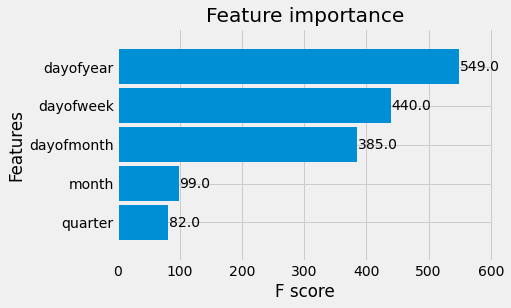

In [127]:
_ = plot_importance(reg1, height=0.9)

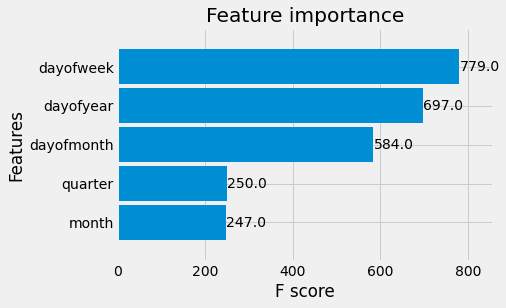

In [128]:
_ = plot_importance(reg2, height=0.9)

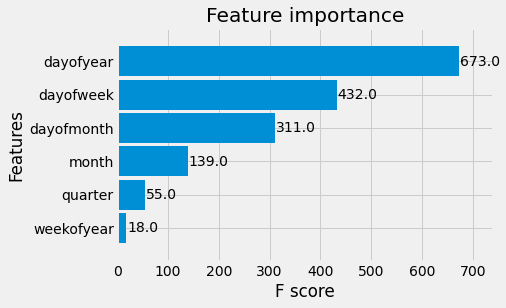

In [129]:
_ = plot_importance(reg3, height=0.9)

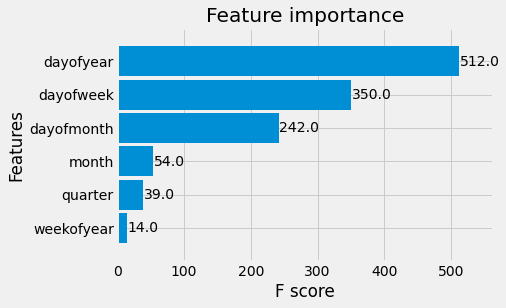

In [130]:
_ = plot_importance(reg4, height=0.9)

In [131]:
for i in range(4):
    number = i + 1
    globals()['donation%s' % number + '_test']['Hasil_Prediksi'] = globals()['reg%s' % number].predict(globals()['X%s' % number + '_test'])
    globals()['all_data%s' % number] = pd.concat([globals()['donation%s' % number + '_test'], globals()['donation%s' % number + '_train']], sort=False)

In [132]:
all_data1

,y,date,hour,dayofweek,quarter,month,year,dayofyear,dayofmonth,weekofyear,Hasil_Prediksi
ds,,,,,,,,,,,
2021-09-16,345000.0,2021-09-16,0,3,3,9,2021,259,16,37,22104.265625
2021-09-18,25000.0,2021-09-18,0,5,3,9,2021,261,18,37,54521.195312
2021-09-19,120000.0,2021-09-19,0,6,3,9,2021,262,19,37,181877.281250
2021-09-21,300000.0,2021-09-21,0,1,3,9,2021,264,21,38,217314.734375
2021-09-22,520000.0,2021-09-22,0,2,3,9,2021,265,22,38,314570.000000
...,...,...,...,...,...,...,...,...,...,...,...
2021-09-08,884500.0,2021-09-08,0,2,3,9,2021,251,8,36,NaN
2021-09-09,80000.0,2021-09-09,0,3,3,9,2021,252,9,36,NaN
2021-09-12,75000.0,2021-09-12,0,6,3,9,2021,255,12,36,NaN


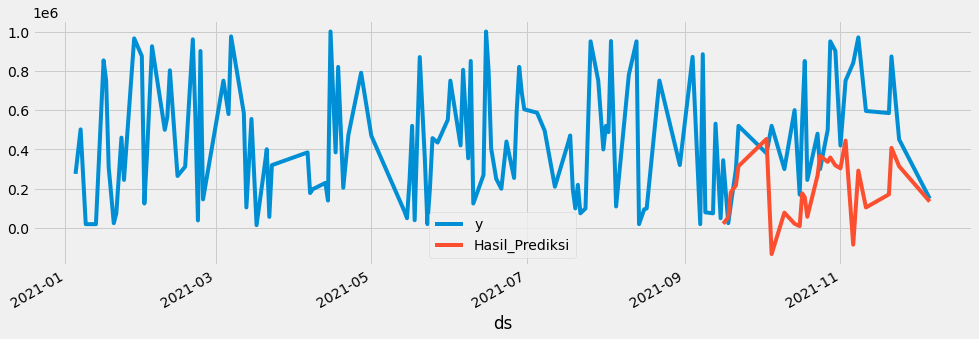

In [133]:
_ = all_data1[['y','Hasil_Prediksi']].plot(figsize=(15, 5))

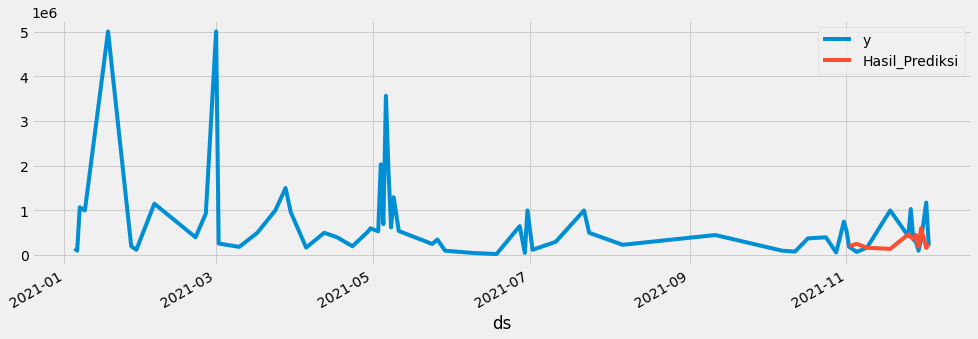

In [134]:
_ = all_data2[['y','Hasil_Prediksi']].plot(figsize=(15, 5))

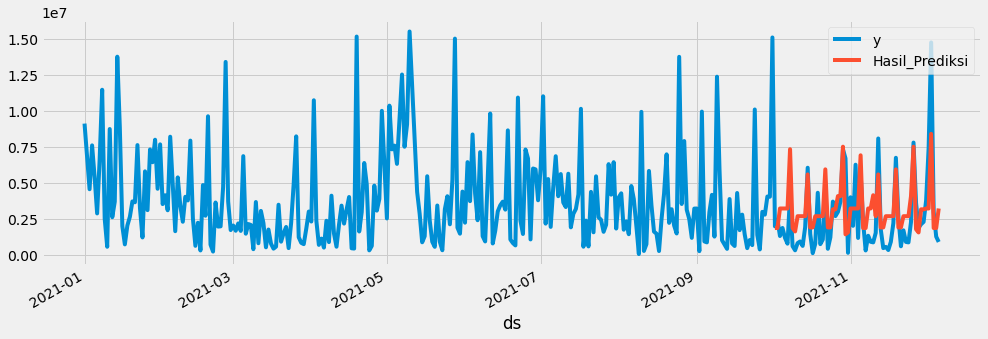

In [135]:
_ = all_data3[['y','Hasil_Prediksi']].plot(figsize=(15, 5))

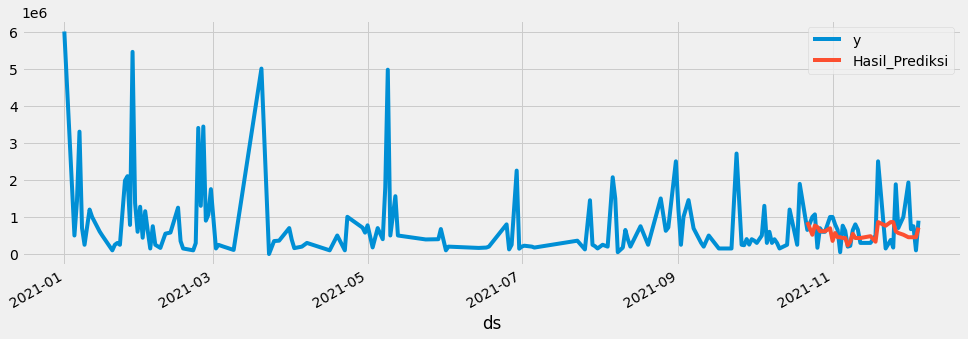

In [136]:
_ = all_data4[['y','Hasil_Prediksi']].plot(figsize=(15, 5))

In [137]:
mse_li = []
for idx in range (4):
    number = idx+1
    nilai_mse = mean_squared_error(y_true=globals()['donation%s' % number+'_test']['y'],
                   y_pred=globals()['donation%s' % number+'_test']['Hasil_Prediksi'])
    mse_li.append(nilai_mse)
    print("{}, MSE = {}".format(list_of_name[idx], nilai_mse))

print("Total rata rata MSE dari 4 Model {}".format(sum(mse_li)/len(mse_li)))

Guest Donasi, MSE = 166094989872.46927
Guest Zakat, MSE = 190633715829.33926
Users Donasi, MSE = 3619459858199.7236
Users Zakat, MSE = 293203684353.7456
Total rata rata MSE dari 4 Model 1067348062063.8195


In [138]:
mape_li = []
for idx in range(4):
    number = idx+1
    nilai_mape = mean_absolute_percentage_error(y_true=globals()['donation%s' % number+'_test']['y'],
                   y_pred=globals()['donation%s' % number+'_test']['Hasil_Prediksi'])
    mape_li.append(nilai_mape)
    print("{}, MAPE = {}".format(list_of_name[idx], nilai_mape))

print("Total rata rata MAPE dari 4 Model {}".format(sum(mape_li)/len(mape_li)))

Guest Donasi, MAPE = 62.45676493285368
Guest Zakat, MAPE = 61.06861570667179
Users Donasi, MAPE = 167.72271860299094
Users Zakat, MAPE = 101.1832422311076
Total rata rata MAPE dari 4 Model 98.10783536840601
